In [44]:
from platform import python_version
print(python_version())

3.8.8


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime

In [3]:
data = pd.read_csv('sat.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72890 entries, 0 to 72889
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           72890 non-null  float64
 1   Y           72890 non-null  float64
 2   time        72890 non-null  float64
 3   wind_speed  72501 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB


In [4]:
data.head()

,X,Y,time,wind_speed
0,11.79,33.169998,42368.149155,47.0
1,11.82,33.219997,42368.149167,50.0
2,11.84,33.270000,42368.149178,50.0
3,11.87,33.309998,42368.149190,48.0
4,11.90,33.360001,42368.149202,43.0


In [5]:
timestamp = 42368.149155

#convert timestamp to datetime object
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object:", dt_object)

dt_object: 1970-01-01 17:16:08.149155


In [6]:
for i in data['time']:
    dt_object = datetime.fromtimestamp(i)
    print(dt_object)

1970-01-01 17:16:08.149155
1970-01-01 17:16:08.149167
1970-01-01 17:16:08.149178
1970-01-01 17:16:08.149190
1970-01-01 17:16:08.149202
1970-01-01 17:16:08.149226
1970-01-01 17:16:08.149249
1970-01-01 17:16:08.149273
1970-01-01 17:16:08.149285
1970-01-01 17:16:08.149297
1970-01-01 17:16:08.149308
1970-01-01 17:16:08.149320
1970-01-01 17:16:08.149332
1970-01-01 17:16:08.149344
1970-01-01 17:16:08.149356
1970-01-01 17:16:08.149367
1970-01-01 17:16:08.149379
1970-01-01 17:16:08.149391
1970-01-01 17:16:08.149403
1970-01-01 17:16:08.149415
1970-01-01 17:16:08.149426
1970-01-01 17:16:08.149438
1970-01-01 17:16:08.149450
1970-01-01 17:16:08.149462
1970-01-01 17:16:08.149474
1970-01-01 17:16:08.149485
1970-01-01 17:16:08.149497
1970-01-01 17:16:08.149509
1970-01-01 17:16:08.149521
1970-01-01 17:16:08.149533
1970-01-01 17:16:08.149545
1970-01-01 17:16:08.149556
1970-01-01 17:16:08.149568
1970-01-01 17:16:08.149580
1970-01-01 17:16:08.149592
1970-01-01 17:16:08.149604
1970-01-01 17:16:08.149615
1

1970-01-01 17:16:12.541718
1970-01-01 17:16:12.541741
1970-01-01 17:16:12.541753
1970-01-01 17:16:12.541777
1970-01-01 17:16:12.541788
1970-01-01 17:16:12.541800
1970-01-01 17:16:12.541812
1970-01-01 17:16:12.541824
1970-01-01 17:16:12.541836
1970-01-01 17:16:12.541847
1970-01-01 17:16:12.541859
1970-01-01 17:16:12.541871
1970-01-01 17:16:12.541883
1970-01-01 17:16:12.541895
1970-01-01 17:16:12.541907
1970-01-01 17:16:12.541918
1970-01-01 17:16:12.541930
1970-01-01 17:16:12.541942
1970-01-01 17:16:12.543365
1970-01-01 17:16:12.543377
1970-01-01 17:16:12.543389
1970-01-01 17:16:12.543401
1970-01-01 17:16:12.543413
1970-01-01 17:16:12.543425
1970-01-01 17:16:12.543436
1970-01-01 17:16:12.543448
1970-01-01 17:16:12.543460
1970-01-01 17:16:12.543472
1970-01-01 17:16:12.543484
1970-01-01 17:16:12.543495
1970-01-01 17:16:12.543507
1970-01-01 17:16:12.543519
1970-01-01 17:16:12.543531
1970-01-01 17:16:12.543543
1970-01-01 17:16:12.543554
1970-01-01 17:16:12.543566
1970-01-01 17:16:12.543578
1

1970-01-01 17:16:16.114346
1970-01-01 17:16:16.114358
1970-01-01 17:16:16.114370
1970-01-01 17:16:16.114382
1970-01-01 17:16:16.114394
1970-01-01 17:16:16.114405
1970-01-01 17:16:16.114417
1970-01-01 17:16:16.114429
1970-01-01 17:16:16.114441
1970-01-01 17:16:16.114453
1970-01-01 17:16:16.114464
1970-01-01 17:16:16.114476
1970-01-01 17:16:16.114488
1970-01-01 17:16:16.114500
1970-01-01 17:16:16.114512
1970-01-01 17:16:16.114524
1970-01-01 17:16:16.114535
1970-01-01 17:16:16.114547
1970-01-01 17:16:16.114559
1970-01-01 17:16:16.114571
1970-01-01 17:16:16.114583
1970-01-01 17:16:16.114594
1970-01-01 17:16:16.114606
1970-01-01 17:16:16.114618
1970-01-01 17:16:16.114630
1970-01-01 17:16:16.114642
1970-01-01 17:16:16.114653
1970-01-01 17:16:16.114665
1970-01-01 17:16:16.114677
1970-01-01 17:16:16.114689
1970-01-01 17:16:16.114701
1970-01-01 17:16:16.114712
1970-01-01 17:16:16.114724
1970-01-01 17:16:16.114736
1970-01-01 17:16:16.114748
1970-01-01 17:16:16.114760
1970-01-01 17:16:16.114771
1

1970-01-01 17:16:21.032009
1970-01-01 17:16:21.032021
1970-01-01 17:16:21.032032
1970-01-01 17:16:21.032044
1970-01-01 17:16:21.032056
1970-01-01 17:16:21.032068
1970-01-01 17:16:21.032080
1970-01-01 17:16:21.032091
1970-01-01 17:16:21.032103
1970-01-01 17:16:21.032115
1970-01-01 17:16:21.032127
1970-01-01 17:16:21.032139
1970-01-01 17:16:21.032150
1970-01-01 17:16:21.032162
1970-01-01 17:16:21.032174
1970-01-01 17:16:21.032186
1970-01-01 17:16:21.032198
1970-01-01 17:16:21.032209
1970-01-01 17:16:21.032221
1970-01-01 17:16:21.032233
1970-01-01 17:16:21.032245
1970-01-01 17:16:21.032257
1970-01-01 17:16:21.032268
1970-01-01 17:16:21.032280
1970-01-01 17:16:21.032292
1970-01-01 17:16:21.032304
1970-01-01 17:16:21.032316
1970-01-01 17:16:21.032328
1970-01-01 17:16:21.032339
1970-01-01 17:16:21.032351
1970-01-01 17:16:21.032363
1970-01-01 17:16:21.032375
1970-01-01 17:16:21.032387
1970-01-01 17:16:21.032398
1970-01-01 17:16:21.032410
1970-01-01 17:16:21.032422
1970-01-01 17:16:21.032434
1

1970-01-01 17:16:24.410566
1970-01-01 17:16:24.410578
1970-01-01 17:16:24.410590
1970-01-01 17:16:24.410602
1970-01-01 17:16:24.410614
1970-01-01 17:16:24.410625
1970-01-01 17:16:24.410637
1970-01-01 17:16:24.410649
1970-01-01 17:16:24.410661
1970-01-01 17:16:24.410673
1970-01-01 17:16:24.410696
1970-01-01 17:16:24.410708
1970-01-01 17:16:24.410720
1970-01-01 17:16:24.410732
1970-01-01 17:16:24.410744
1970-01-01 17:16:24.410755
1970-01-01 17:16:24.410767
1970-01-01 17:16:24.410779
1970-01-01 17:16:24.410791
1970-01-01 17:16:24.410803
1970-01-01 17:16:24.410814
1970-01-01 17:16:24.410826
1970-01-01 17:16:24.410838
1970-01-01 17:16:24.410850
1970-01-01 17:16:24.410862
1970-01-01 17:16:24.410873
1970-01-01 17:16:24.410885
1970-01-01 17:16:24.410897
1970-01-01 17:16:24.410909
1970-01-01 17:16:24.410921
1970-01-01 17:16:24.410932
1970-01-01 17:16:24.410944
1970-01-01 17:16:24.410956
1970-01-01 17:16:24.410968
1970-01-01 17:16:24.410980
1970-01-01 17:16:24.410991
1970-01-01 17:16:24.411003
1

1970-01-01 17:16:28.996508
1970-01-01 17:16:28.996520
1970-01-01 17:16:28.996532
1970-01-01 17:16:28.996544
1970-01-01 17:16:28.996556
1970-01-01 17:16:28.996567
1970-01-01 17:16:28.996591
1970-01-01 17:16:28.996638
1970-01-01 17:16:28.996662
1970-01-01 17:16:28.996674
1970-01-01 17:16:28.996697
1970-01-01 17:16:28.996709
1970-01-01 17:16:28.996745
1970-01-01 17:16:28.996768
1970-01-01 17:16:28.996792
1970-01-01 17:16:28.997016
1970-01-01 17:16:28.997028
1970-01-01 17:16:28.997063
1970-01-01 17:16:28.997087
1970-01-01 17:16:28.997111
1970-01-01 17:16:28.997122
1970-01-01 17:16:28.997134
1970-01-01 17:16:28.997146
1970-01-01 17:16:28.997158
1970-01-01 17:16:28.997205
1970-01-01 17:16:28.997851
1970-01-01 17:16:28.997898
1970-01-01 17:16:28.997910
1970-01-01 17:16:28.997934
1970-01-01 17:16:28.997945
1970-01-01 17:16:28.997957
1970-01-01 17:16:28.997981
1970-01-01 17:16:28.997993
1970-01-01 17:16:28.998004
1970-01-01 17:16:29.408096
1970-01-01 17:16:29.408108
1970-01-01 17:16:29.408132
1

1970-01-01 17:16:34.325178
1970-01-01 17:16:34.325190
1970-01-01 17:16:34.325213
1970-01-01 17:16:34.325225
1970-01-01 17:16:34.325237
1970-01-01 17:16:34.325249
1970-01-01 17:16:34.325261
1970-01-01 17:16:34.325272
1970-01-01 17:16:34.325284
1970-01-01 17:16:34.325296
1970-01-01 17:16:34.325320
1970-01-01 17:16:34.325331
1970-01-01 17:16:34.325343
1970-01-01 17:16:34.325367
1970-01-01 17:16:34.325390
1970-01-01 17:16:34.325402
1970-01-01 17:16:34.325426
1970-01-01 17:16:34.325450
1970-01-01 17:16:34.325461
1970-01-01 17:16:34.325485
1970-01-01 17:16:34.325509
1970-01-01 17:16:34.325532
1970-01-01 17:16:34.325544
1970-01-01 17:16:34.325556
1970-01-01 17:16:34.325579
1970-01-01 17:16:34.325591
1970-01-01 17:16:34.325615
1970-01-01 17:16:34.325638
1970-01-01 17:16:34.325650
1970-01-01 17:16:34.325662
1970-01-01 17:16:34.325697
1970-01-01 17:16:34.325721
1970-01-01 17:16:34.325733
1970-01-01 17:16:34.326588
1970-01-01 17:16:34.326599
1970-01-01 17:16:34.326635
1970-01-01 17:16:34.326659
1

1970-01-01 17:16:41.274560
1970-01-01 17:16:41.274572
1970-01-01 17:16:41.274584
1970-01-01 17:16:41.274596
1970-01-01 17:16:41.274607
1970-01-01 17:16:41.274619
1970-01-01 17:16:41.274643
1970-01-01 17:16:41.274655
1970-01-01 17:16:41.274666
1970-01-01 17:16:41.274678
1970-01-01 17:16:41.274690
1970-01-01 17:16:41.274726
1970-01-01 17:16:41.274761
1970-01-01 17:16:41.274773
1970-01-01 17:16:41.274785
1970-01-01 17:16:41.274832
1970-01-01 17:16:41.274879
1970-01-01 17:16:41.274891
1970-01-01 17:16:41.274903
1970-01-01 17:16:41.274926
1970-01-01 17:16:41.274938
1970-01-01 17:16:41.274962
1970-01-01 17:16:41.274973
1970-01-01 17:16:41.274997
1970-01-01 17:16:41.275044
1970-01-01 17:16:41.275068
1970-01-01 17:16:41.275080
1970-01-01 17:16:41.275092
1970-01-01 17:16:41.275103
1970-01-01 17:16:41.275127
1970-01-01 17:16:41.275139
1970-01-01 17:16:41.275151
1970-01-01 17:16:41.275162
1970-01-01 17:16:41.275174
1970-01-01 17:16:41.275186
1970-01-01 17:16:41.275210
1970-01-01 17:16:41.275221
1

1970-01-01 17:16:44.240823
1970-01-01 17:16:44.240834
1970-01-01 17:16:44.240846
1970-01-01 17:16:44.240858
1970-01-01 17:16:44.240870
1970-01-01 17:16:44.240882
1970-01-01 17:16:44.240893
1970-01-01 17:16:44.240905
1970-01-01 17:16:44.240917
1970-01-01 17:16:44.240929
1970-01-01 17:16:44.240941
1970-01-01 17:16:44.240952
1970-01-01 17:16:44.240964
1970-01-01 17:16:44.240976
1970-01-01 17:16:44.240988
1970-01-01 17:16:44.241000
1970-01-01 17:16:44.241011
1970-01-01 17:16:44.241023
1970-01-01 17:16:44.241035
1970-01-01 17:16:44.241047
1970-01-01 17:16:44.241059
1970-01-01 17:16:44.241070
1970-01-01 17:16:44.241082
1970-01-01 17:16:44.241094
1970-01-01 17:16:44.241106
1970-01-01 17:16:44.241118
1970-01-01 17:16:44.241129
1970-01-01 17:16:44.241141
1970-01-01 17:16:44.241153
1970-01-01 17:16:44.241165
1970-01-01 17:16:44.241177
1970-01-01 17:16:44.241189
1970-01-01 17:16:44.241200
1970-01-01 17:16:44.241212
1970-01-01 17:16:44.241224
1970-01-01 17:16:44.241236
1970-01-01 17:16:44.241248
1

1970-01-01 17:16:45.860875
1970-01-01 17:16:45.860887
1970-01-01 17:16:45.860899
1970-01-01 17:16:45.860911
1970-01-01 17:16:45.860923
1970-01-01 17:16:45.860935
1970-01-01 17:16:45.860946
1970-01-01 17:16:45.860958
1970-01-01 17:16:45.860970
1970-01-01 17:16:45.860982
1970-01-01 17:16:45.860994
1970-01-01 17:16:45.861005
1970-01-01 17:16:45.861017
1970-01-01 17:16:45.861029
1970-01-01 17:16:45.861041
1970-01-01 17:16:45.861053
1970-01-01 17:16:45.861064
1970-01-01 17:16:45.861076
1970-01-01 17:16:45.861088
1970-01-01 17:16:45.861100
1970-01-01 17:16:45.861112
1970-01-01 17:16:45.861123
1970-01-01 17:16:45.861135
1970-01-01 17:16:45.861147
1970-01-01 17:16:45.861159
1970-01-01 17:16:45.861171
1970-01-01 17:16:45.861182
1970-01-01 17:16:45.861194
1970-01-01 17:16:45.861206
1970-01-01 17:16:45.861218
1970-01-01 17:16:45.861230
1970-01-01 17:16:45.861242
1970-01-01 17:16:45.861253
1970-01-01 17:16:45.861265
1970-01-01 17:16:45.861277
1970-01-01 17:16:45.861289
1970-01-01 17:16:45.861301
1

1970-01-01 17:16:50.175478
1970-01-01 17:16:50.175490
1970-01-01 17:16:50.175502
1970-01-01 17:16:50.175513
1970-01-01 17:16:50.175525
1970-01-01 17:16:50.175537
1970-01-01 17:16:50.175549
1970-01-01 17:16:50.175561
1970-01-01 17:16:50.175572
1970-01-01 17:16:50.175584
1970-01-01 17:16:50.175596
1970-01-01 17:16:50.175608
1970-01-01 17:16:50.175620
1970-01-01 17:16:50.175631
1970-01-01 17:16:50.175643
1970-01-01 17:16:50.175655
1970-01-01 17:16:50.175667
1970-01-01 17:16:50.175679
1970-01-01 17:16:50.175690
1970-01-01 17:16:50.175702
1970-01-01 17:16:50.175714
1970-01-01 17:16:50.175726
1970-01-01 17:16:50.175738
1970-01-01 17:16:50.175749
1970-01-01 17:16:50.175761
1970-01-01 17:16:50.175924
1970-01-01 17:16:50.175935
1970-01-01 17:16:50.175947
1970-01-01 17:16:50.175959
1970-01-01 17:16:50.175971
1970-01-01 17:16:50.175983
1970-01-01 17:16:50.175994
1970-01-01 17:16:50.176006
1970-01-01 17:16:50.176018
1970-01-01 17:16:50.176030
1970-01-01 17:16:50.176042
1970-01-01 17:16:50.176053
1

1970-01-01 17:16:53.745961
1970-01-01 17:16:53.745973
1970-01-01 17:16:53.745985
1970-01-01 17:16:53.745997
1970-01-01 17:16:53.746009
1970-01-01 17:16:53.746020
1970-01-01 17:16:53.746032
1970-01-01 17:16:53.746044
1970-01-01 17:16:53.746056
1970-01-01 17:16:53.746068
1970-01-01 17:16:53.746079
1970-01-01 17:16:53.746091
1970-01-01 17:16:53.746103
1970-01-01 17:16:53.746115
1970-01-01 17:16:53.746127
1970-01-01 17:16:53.746139
1970-01-01 17:16:53.746150
1970-01-01 17:16:53.746162
1970-01-01 17:16:53.746174
1970-01-01 17:16:53.746186
1970-01-01 17:16:53.746198
1970-01-01 17:16:53.746209
1970-01-01 17:16:53.746221
1970-01-01 17:16:53.746233
1970-01-01 17:16:53.746245
1970-01-01 17:16:53.746257
1970-01-01 17:16:53.746268
1970-01-01 17:16:53.746280
1970-01-01 17:16:53.746292
1970-01-01 17:16:53.746304
1970-01-01 17:16:53.746316
1970-01-01 17:16:53.746327
1970-01-01 17:16:53.746339
1970-01-01 17:16:53.746351
1970-01-01 17:16:53.746363
1970-01-01 17:16:53.746375
1970-01-01 17:16:53.746386
1

1970-01-01 17:16:57.728308
1970-01-01 17:16:57.728320
1970-01-01 17:16:57.728332
1970-01-01 17:16:57.728641
1970-01-01 17:16:57.728653
1970-01-01 17:16:57.728665
1970-01-01 17:16:57.728688
1970-01-01 17:16:57.728700
1970-01-01 17:16:57.728712
1970-01-01 17:16:57.728724
1970-01-01 17:16:57.728736
1970-01-01 17:16:57.728748
1970-01-01 17:16:57.728759
1970-01-01 17:16:57.728795
1970-01-01 17:16:57.728807
1970-01-01 17:16:57.728818
1970-01-01 17:16:57.728830
1970-01-01 17:16:57.728842
1970-01-01 17:16:57.728854
1970-01-01 17:16:57.728866
1970-01-01 17:16:57.728877
1970-01-01 17:16:57.728889
1970-01-01 17:16:57.728901
1970-01-01 17:16:57.728913
1970-01-01 17:16:57.728925
1970-01-01 17:16:57.728936
1970-01-01 17:16:57.728948
1970-01-01 17:16:57.728960
1970-01-01 17:16:57.728972
1970-01-01 17:16:57.729421
1970-01-01 17:16:57.729432
1970-01-01 17:16:57.729444
1970-01-01 17:16:57.729456
1970-01-01 17:16:57.729468
1970-01-01 17:16:57.729480
1970-01-01 17:16:57.729492
1970-01-01 17:16:57.729503
1

1970-01-01 17:17:02.725423
1970-01-01 17:17:02.725435
1970-01-01 17:17:02.725447
1970-01-01 17:17:02.725458
1970-01-01 17:17:02.725470
1970-01-01 17:17:02.725482
1970-01-01 17:17:02.725494
1970-01-01 17:17:02.725506
1970-01-01 17:17:02.725517
1970-01-01 17:17:02.725529
1970-01-01 17:17:02.725541
1970-01-01 17:17:02.725553
1970-01-01 17:17:02.725565
1970-01-01 17:17:02.725576
1970-01-01 17:17:02.725588
1970-01-01 17:17:02.725600
1970-01-01 17:17:02.725612
1970-01-01 17:17:02.725624
1970-01-01 17:17:02.725635
1970-01-01 17:17:02.725647
1970-01-01 17:17:02.725659
1970-01-01 17:17:02.725671
1970-01-01 17:17:02.725730
1970-01-01 17:17:02.725742
1970-01-01 17:17:02.725754
1970-01-01 17:17:02.725765
1970-01-01 17:17:02.725777
1970-01-01 17:17:02.725789
1970-01-01 17:17:02.725801
1970-01-01 17:17:02.725813
1970-01-01 17:17:02.725824
1970-01-01 17:17:02.725836
1970-01-01 17:17:02.725848
1970-01-01 17:17:02.725860
1970-01-01 17:17:02.725872
1970-01-01 17:17:02.725883
1970-01-01 17:17:02.725895
1

1970-01-01 17:17:07.039237
1970-01-01 17:17:07.039249
1970-01-01 17:17:07.039261
1970-01-01 17:17:07.039273
1970-01-01 17:17:07.039285
1970-01-01 17:17:07.039296
1970-01-01 17:17:07.039308
1970-01-01 17:17:07.039320
1970-01-01 17:17:07.039332
1970-01-01 17:17:07.039344
1970-01-01 17:17:07.039355
1970-01-01 17:17:07.039367
1970-01-01 17:17:07.039379
1970-01-01 17:17:07.039391
1970-01-01 17:17:07.039403
1970-01-01 17:17:07.039414
1970-01-01 17:17:07.039426
1970-01-01 17:17:07.039438
1970-01-01 17:17:07.039450
1970-01-01 17:17:07.039462
1970-01-01 17:17:07.039474
1970-01-01 17:17:07.039485
1970-01-01 17:17:07.039497
1970-01-01 17:17:07.039509
1970-01-01 17:17:07.039521
1970-01-01 17:17:07.039533
1970-01-01 17:17:07.039544
1970-01-01 17:17:07.039556
1970-01-01 17:17:07.039580
1970-01-01 17:17:07.039592
1970-01-01 17:17:07.039603
1970-01-01 17:17:07.039615
1970-01-01 17:17:07.039627
1970-01-01 17:17:07.039639
1970-01-01 17:17:07.039651
1970-01-01 17:17:07.039662
1970-01-01 17:17:07.039674
1

1970-01-01 17:17:11.021302
1970-01-01 17:17:11.021313
1970-01-01 17:17:11.021325
1970-01-01 17:17:11.021337
1970-01-01 17:17:11.021349
1970-01-01 17:17:11.021361
1970-01-01 17:17:11.021372
1970-01-01 17:17:11.021384
1970-01-01 17:17:11.021396
1970-01-01 17:17:11.021408
1970-01-01 17:17:11.021420
1970-01-01 17:17:11.021432
1970-01-01 17:17:11.021443
1970-01-01 17:17:11.021455
1970-01-01 17:17:11.021467
1970-01-01 17:17:11.021479
1970-01-01 17:17:11.021491
1970-01-01 17:17:11.021502
1970-01-01 17:17:11.021514
1970-01-01 17:17:11.021526
1970-01-01 17:17:11.021538
1970-01-01 17:17:11.021561
1970-01-01 17:17:11.021573
1970-01-01 17:17:11.021585
1970-01-01 17:17:11.021597
1970-01-01 17:17:11.021609
1970-01-01 17:17:11.021620
1970-01-01 17:17:11.021632
1970-01-01 17:17:11.021644
1970-01-01 17:17:11.021656
1970-01-01 17:17:11.021668
1970-01-01 17:17:11.021679
1970-01-01 17:17:11.021691
1970-01-01 17:17:11.021703
1970-01-01 17:17:11.021715
1970-01-01 17:17:11.021727
1970-01-01 17:17:11.021738
1

1970-01-01 17:17:14.593076
1970-01-01 17:17:14.593088
1970-01-01 17:17:14.593099
1970-01-01 17:17:14.593111
1970-01-01 17:17:14.593123
1970-01-01 17:17:14.593135
1970-01-01 17:17:14.593147
1970-01-01 17:17:14.593158
1970-01-01 17:17:14.593170
1970-01-01 17:17:14.593182
1970-01-01 17:17:14.593194
1970-01-01 17:17:14.593206
1970-01-01 17:17:14.593217
1970-01-01 17:17:14.593229
1970-01-01 17:17:14.593241
1970-01-01 17:17:14.593253
1970-01-01 17:17:14.593265
1970-01-01 17:17:14.593277
1970-01-01 17:17:14.593288
1970-01-01 17:17:14.593300
1970-01-01 17:17:14.593312
1970-01-01 17:17:14.593324
1970-01-01 17:17:14.593336
1970-01-01 17:17:14.593347
1970-01-01 17:17:14.593359
1970-01-01 17:17:14.593371
1970-01-01 17:17:14.593383
1970-01-01 17:17:14.593395
1970-01-01 17:17:14.593406
1970-01-01 17:17:14.593418
1970-01-01 17:17:14.593430
1970-01-01 17:17:14.593442
1970-01-01 17:17:14.593454
1970-01-01 17:17:14.593465
1970-01-01 17:17:14.593477
1970-01-01 17:17:14.593489
1970-01-01 17:17:14.593501
1

1970-01-01 17:17:18.986680
1970-01-01 17:17:19.589194
1970-01-01 17:17:19.589206
1970-01-01 17:17:19.589218
1970-01-01 17:17:19.589230
1970-01-01 17:17:19.589253
1970-01-01 17:17:19.589277
1970-01-01 17:17:19.589442
1970-01-01 17:17:19.589454
1970-01-01 17:17:19.589478
1970-01-01 17:17:19.589489
1970-01-01 17:17:19.922247
1970-01-01 17:17:19.922259
1970-01-01 17:17:19.922271
1970-01-01 17:17:19.922283
1970-01-01 17:17:19.922295
1970-01-01 17:17:19.922306
1970-01-01 17:17:19.922318
1970-01-01 17:17:19.922330
1970-01-01 17:17:19.922342
1970-01-01 17:17:19.922354
1970-01-01 17:17:19.922365
1970-01-01 17:17:19.922401
1970-01-01 17:17:19.922413
1970-01-01 17:17:19.922424
1970-01-01 17:17:19.922436
1970-01-01 17:17:19.922448
1970-01-01 17:17:19.922460
1970-01-01 17:17:19.922507
1970-01-01 17:17:19.922542
1970-01-01 17:17:19.922554
1970-01-01 17:17:19.922566
1970-01-01 17:17:19.922578
1970-01-01 17:17:19.922590
1970-01-01 17:17:19.922601
1970-01-01 17:17:19.922637
1970-01-01 17:17:19.922649
1

1970-01-01 17:17:23.493359
1970-01-01 17:17:23.493371
1970-01-01 17:17:23.493383
1970-01-01 17:17:23.493395
1970-01-01 17:17:23.493406
1970-01-01 17:17:23.493418
1970-01-01 17:17:23.493430
1970-01-01 17:17:23.493442
1970-01-01 17:17:23.493454
1970-01-01 17:17:23.493465
1970-01-01 17:17:23.493477
1970-01-01 17:17:23.573140
1970-01-01 17:17:23.573152
1970-01-01 17:17:23.573164
1970-01-01 17:17:23.573176
1970-01-01 17:17:23.573188
1970-01-01 17:17:23.573200
1970-01-01 17:17:23.573211
1970-01-01 17:17:23.573223
1970-01-01 17:17:23.573235
1970-01-01 17:17:23.573247
1970-01-01 17:17:23.573259
1970-01-01 17:17:23.573270
1970-01-01 17:17:23.573282
1970-01-01 17:17:23.573294
1970-01-01 17:17:23.573306
1970-01-01 17:17:23.573318
1970-01-01 17:17:23.573329
1970-01-01 17:17:23.573341
1970-01-01 17:17:23.573353
1970-01-01 17:17:23.573365
1970-01-01 17:17:23.573377
1970-01-01 17:17:23.573388
1970-01-01 17:17:23.573400
1970-01-01 17:17:23.573412
1970-01-01 17:17:23.573424
1970-01-01 17:17:23.573436
1

1970-01-01 17:17:27.886328
1970-01-01 17:17:27.886340
1970-01-01 17:17:27.886351
1970-01-01 17:17:27.886363
1970-01-01 17:17:27.886375
1970-01-01 17:17:27.886422
1970-01-01 17:17:27.886434
1970-01-01 17:17:27.886446
1970-01-01 17:17:27.886458
1970-01-01 17:17:27.886469
1970-01-01 17:17:27.886481
1970-01-01 17:17:27.886493
1970-01-01 17:17:27.886505
1970-01-01 17:17:27.886517
1970-01-01 17:17:27.886528
1970-01-01 17:17:27.886540
1970-01-01 17:17:27.886552
1970-01-01 17:17:27.886564
1970-01-01 17:17:27.886576
1970-01-01 17:17:27.886587
1970-01-01 17:17:27.886599
1970-01-01 17:17:27.886611
1970-01-01 17:17:27.886623
1970-01-01 17:17:27.886635
1970-01-01 17:17:27.886647
1970-01-01 17:17:27.886658
1970-01-01 17:17:27.886670
1970-01-01 17:17:27.886682
1970-01-01 17:17:27.886694
1970-01-01 17:17:27.886706
1970-01-01 17:17:27.886717
1970-01-01 17:17:27.886729
1970-01-01 17:17:27.886741
1970-01-01 17:17:27.886753
1970-01-01 17:17:27.886765
1970-01-01 17:17:27.886776
1970-01-01 17:17:27.886788
1

1970-01-01 17:17:31.459000
1970-01-01 17:17:31.459012
1970-01-01 17:17:31.459024
1970-01-01 17:17:31.459035
1970-01-01 17:17:31.459047
1970-01-01 17:17:31.459059
1970-01-01 17:17:31.459071
1970-01-01 17:17:31.459083
1970-01-01 17:17:31.459094
1970-01-01 17:17:31.459106
1970-01-01 17:17:31.459118
1970-01-01 17:17:31.459130
1970-01-01 17:17:31.866712
1970-01-01 17:17:31.866724
1970-01-01 17:17:31.866736
1970-01-01 17:17:31.866748
1970-01-01 17:17:31.866759
1970-01-01 17:17:31.866771
1970-01-01 17:17:31.866783
1970-01-01 17:17:31.866795
1970-01-01 17:17:31.866807
1970-01-01 17:17:31.866819
1970-01-01 17:17:31.866830
1970-01-01 17:17:31.866842
1970-01-01 17:17:31.866854
1970-01-01 17:17:31.866866
1970-01-01 17:17:31.866878
1970-01-01 17:17:31.866889
1970-01-01 17:17:31.866901
1970-01-01 17:17:31.866913
1970-01-01 17:17:31.866925
1970-01-01 17:17:31.866937
1970-01-01 17:17:31.866948
1970-01-01 17:17:31.866960
1970-01-01 17:17:31.866972
1970-01-01 17:17:31.866984
1970-01-01 17:17:31.866996
1

1970-01-01 17:17:34.835605
1970-01-01 17:17:34.835617
1970-01-01 17:17:34.835628
1970-01-01 17:17:34.835640
1970-01-01 17:17:34.835652
1970-01-01 17:17:34.835664
1970-01-01 17:17:34.835676
1970-01-01 17:17:35.438981
1970-01-01 17:17:35.438992
1970-01-01 17:17:35.439004
1970-01-01 17:17:35.439016
1970-01-01 17:17:35.439028
1970-01-01 17:17:35.439040
1970-01-01 17:17:35.439051
1970-01-01 17:17:35.439063
1970-01-01 17:17:35.439075
1970-01-01 17:17:35.439087
1970-01-01 17:17:35.439099
1970-01-01 17:17:35.439110
1970-01-01 17:17:35.439122
1970-01-01 17:17:35.439134
1970-01-01 17:17:35.439146
1970-01-01 17:17:35.439158
1970-01-01 17:17:35.439169
1970-01-01 17:17:35.439181
1970-01-01 17:17:35.439193
1970-01-01 17:17:35.439205
1970-01-01 17:17:35.439217
1970-01-01 17:17:35.439228
1970-01-01 17:17:35.439240
1970-01-01 17:17:35.439252
1970-01-01 17:17:35.439264
1970-01-01 17:17:35.439276
1970-01-01 17:17:35.439288
1970-01-01 17:17:35.439299
1970-01-01 17:17:35.439311
1970-01-01 17:17:35.439323
1

1970-01-01 17:17:39.755497
1970-01-01 17:17:39.755509
1970-01-01 17:17:39.755521
1970-01-01 17:17:39.755533
1970-01-01 17:17:39.755556
1970-01-01 17:17:39.755580
1970-01-01 17:17:39.755592
1970-01-01 17:17:40.356727
1970-01-01 17:17:40.356739
1970-01-01 17:17:40.356751
1970-01-01 17:17:40.356763
1970-01-01 17:17:40.356775
1970-01-01 17:17:40.356786
1970-01-01 17:17:40.356798
1970-01-01 17:17:40.356810
1970-01-01 17:17:40.356822
1970-01-01 17:17:40.356834
1970-01-01 17:17:40.356845
1970-01-01 17:17:40.356857
1970-01-01 17:17:40.356869
1970-01-01 17:17:40.356881
1970-01-01 17:17:40.356893
1970-01-01 17:17:40.356904
1970-01-01 17:17:40.356916
1970-01-01 17:17:40.356928
1970-01-01 17:17:40.356940
1970-01-01 17:17:40.356952
1970-01-01 17:17:40.356964
1970-01-01 17:17:40.356975
1970-01-01 17:17:40.356987
1970-01-01 17:17:40.356999
1970-01-01 17:17:40.357011
1970-01-01 17:17:40.357023
1970-01-01 17:17:40.357034
1970-01-01 17:17:40.357046
1970-01-01 17:17:40.357058
1970-01-01 17:17:40.357070
1

1970-01-01 17:17:45.355206
1970-01-01 17:17:45.355218
1970-01-01 17:17:45.355230
1970-01-01 17:17:45.355241
1970-01-01 17:17:45.355253
1970-01-01 17:17:45.355265
1970-01-01 17:17:45.355277
1970-01-01 17:17:45.355289
1970-01-01 17:17:45.355300
1970-01-01 17:17:45.355312
1970-01-01 17:17:45.355324
1970-01-01 17:17:45.355336
1970-01-01 17:17:45.355348
1970-01-01 17:17:45.355359
1970-01-01 17:17:45.355371
1970-01-01 17:17:45.355383
1970-01-01 17:17:45.355395
1970-01-01 17:17:45.355407
1970-01-01 17:17:45.355418
1970-01-01 17:17:45.355430
1970-01-01 17:17:45.355442
1970-01-01 17:17:45.355454
1970-01-01 17:17:45.355466
1970-01-01 17:17:45.355478
1970-01-01 17:17:45.355489
1970-01-01 17:17:45.355501
1970-01-01 17:17:45.355513
1970-01-01 17:17:45.355525
1970-01-01 17:17:45.355537
1970-01-01 17:17:45.355548
1970-01-01 17:17:45.355560
1970-01-01 17:17:45.355572
1970-01-01 17:17:45.355584
1970-01-01 17:17:45.355596
1970-01-01 17:17:45.355607
1970-01-01 17:17:45.355619
1970-01-01 17:17:45.355631
1

1970-01-01 17:17:49.670315
1970-01-01 17:17:49.670327
1970-01-01 17:17:49.670339
1970-01-01 17:17:49.670351
1970-01-01 17:17:49.670363
1970-01-01 17:17:49.670374
1970-01-01 17:17:49.670386
1970-01-01 17:17:49.670398
1970-01-01 17:17:49.670410
1970-01-01 17:17:49.670422
1970-01-01 17:17:49.670433
1970-01-01 17:17:49.670445
1970-01-01 17:17:49.670457
1970-01-01 17:17:49.670469
1970-01-01 17:17:49.670481
1970-01-01 17:17:49.670492
1970-01-01 17:17:49.670504
1970-01-01 17:17:49.670516
1970-01-01 17:17:49.670528
1970-01-01 17:17:49.670540
1970-01-01 17:17:49.670563
1970-01-01 17:17:49.670575
1970-01-01 17:17:49.670587
1970-01-01 17:17:49.670599
1970-01-01 17:17:49.670611
1970-01-01 17:17:49.670622
1970-01-01 17:17:49.670634
1970-01-01 17:17:49.670646
1970-01-01 17:17:49.670658
1970-01-01 17:17:49.670670
1970-01-01 17:17:49.670681
1970-01-01 17:17:49.670693
1970-01-01 17:17:49.670705
1970-01-01 17:17:49.670717
1970-01-01 17:17:49.670729
1970-01-01 17:17:49.670740
1970-01-01 17:17:49.670752
1

1970-01-01 17:17:52.636935
1970-01-01 17:17:52.636958
1970-01-01 17:17:52.636982
1970-01-01 17:17:53.238893
1970-01-01 17:17:53.238917
1970-01-01 17:17:53.238929
1970-01-01 17:17:53.238941
1970-01-01 17:17:53.238953
1970-01-01 17:17:53.238964
1970-01-01 17:17:53.238976
1970-01-01 17:17:53.238988
1970-01-01 17:17:53.239000
1970-01-01 17:17:53.239012
1970-01-01 17:17:53.239023
1970-01-01 17:17:53.239035
1970-01-01 17:17:53.239047
1970-01-01 17:17:53.239059
1970-01-01 17:17:53.239071
1970-01-01 17:17:53.239082
1970-01-01 17:17:53.239094
1970-01-01 17:17:53.239106
1970-01-01 17:17:53.239118
1970-01-01 17:17:53.239130
1970-01-01 17:17:53.239141
1970-01-01 17:17:53.239153
1970-01-01 17:17:53.239165
1970-01-01 17:17:53.239177
1970-01-01 17:17:53.239189
1970-01-01 17:17:53.239200
1970-01-01 17:17:53.239212
1970-01-01 17:17:53.239224
1970-01-01 17:17:53.239236
1970-01-01 17:17:53.239248
1970-01-01 17:17:53.239260
1970-01-01 17:17:53.239271
1970-01-01 17:17:53.239283
1970-01-01 17:17:53.239295
1

1970-01-01 17:17:57.221954
1970-01-01 17:17:57.221966
1970-01-01 17:17:57.221978
1970-01-01 17:17:57.221990
1970-01-01 17:17:57.222001
1970-01-01 17:17:57.222013
1970-01-01 17:17:57.222025
1970-01-01 17:17:57.222037
1970-01-01 17:17:57.222049
1970-01-01 17:17:57.222060
1970-01-01 17:17:57.222084
1970-01-01 17:17:57.222096
1970-01-01 17:17:57.222108
1970-01-01 17:17:57.222119
1970-01-01 17:17:57.222131
1970-01-01 17:17:57.222143
1970-01-01 17:17:57.222179
1970-01-01 17:17:57.222485
1970-01-01 17:17:57.222497
1970-01-01 17:17:57.222509
1970-01-01 17:17:57.222556
1970-01-01 17:17:57.222568
1970-01-01 17:17:57.222580
1970-01-01 17:17:57.222591
1970-01-01 17:17:57.222603
1970-01-01 17:17:57.222615
1970-01-01 17:17:57.222639
1970-01-01 17:17:57.222650
1970-01-01 17:17:57.222662
1970-01-01 17:17:57.222674
1970-01-01 17:17:57.222686
1970-01-01 17:17:57.222698
1970-01-01 17:17:57.222710
1970-01-01 17:17:57.222721
1970-01-01 17:17:57.222733
1970-01-01 17:17:57.222757
1970-01-01 17:17:57.222769
1

1970-01-01 17:18:01.204983
1970-01-01 17:18:01.204995
1970-01-01 17:18:01.205007
1970-01-01 17:18:01.205019
1970-01-01 17:18:01.205031
1970-01-01 17:18:01.205042
1970-01-01 17:18:01.205054
1970-01-01 17:18:01.205066
1970-01-01 17:18:01.205078
1970-01-01 17:18:01.205090
1970-01-01 17:18:01.205102
1970-01-01 17:18:01.205113
1970-01-01 17:18:01.205125
1970-01-01 17:18:01.205137
1970-01-01 17:18:01.205149
1970-01-01 17:18:01.205161
1970-01-01 17:18:01.205172
1970-01-01 17:18:01.205184
1970-01-01 17:18:01.205196
1970-01-01 17:18:01.205208
1970-01-01 17:18:01.205220
1970-01-01 17:18:01.205231
1970-01-01 17:18:01.205243
1970-01-01 17:18:01.205255
1970-01-01 17:18:01.205267
1970-01-01 17:18:01.205279
1970-01-01 17:18:01.205290
1970-01-01 17:18:01.205302
1970-01-01 17:18:01.205774
1970-01-01 17:18:01.205786
1970-01-01 17:18:01.205798
1970-01-01 17:18:01.205810
1970-01-01 17:18:01.205821
1970-01-01 17:18:01.205833
1970-01-01 17:18:01.205857
1970-01-01 17:18:01.205869
1970-01-01 17:18:01.205880
1

1970-01-01 17:18:04.580712
1970-01-01 17:18:04.580724
1970-01-01 17:18:04.580736
1970-01-01 17:18:04.580748
1970-01-01 17:18:04.580760
1970-01-01 17:18:04.580771
1970-01-01 17:18:04.580783
1970-01-01 17:18:04.580795
1970-01-01 17:18:04.580807
1970-01-01 17:18:04.580819
1970-01-01 17:18:04.580830
1970-01-01 17:18:04.580842
1970-01-01 17:18:04.580854
1970-01-01 17:18:04.580866
1970-01-01 17:18:04.580878
1970-01-01 17:18:04.580889
1970-01-01 17:18:04.580901
1970-01-01 17:18:04.581755
1970-01-01 17:18:04.581767
1970-01-01 17:18:04.581778
1970-01-01 17:18:04.581802
1970-01-01 17:18:04.581814
1970-01-01 17:18:04.581826
1970-01-01 17:18:04.581837
1970-01-01 17:18:04.581849
1970-01-01 17:18:04.581861
1970-01-01 17:18:04.581873
1970-01-01 17:18:04.581885
1970-01-01 17:18:04.581896
1970-01-01 17:18:04.581908
1970-01-01 17:18:04.581920
1970-01-01 17:18:04.581932
1970-01-01 17:18:04.581944
1970-01-01 17:18:04.581955
1970-01-01 17:18:04.581967
1970-01-01 17:18:04.581979
1970-01-01 17:18:04.581991
1

1970-01-01 17:18:08.152751
1970-01-01 17:18:08.152763
1970-01-01 17:18:08.152775
1970-01-01 17:18:08.152786
1970-01-01 17:18:08.152798
1970-01-01 17:18:08.152810
1970-01-01 17:18:08.152822
1970-01-01 17:18:08.152834
1970-01-01 17:18:08.152845
1970-01-01 17:18:08.152857
1970-01-01 17:18:08.152869
1970-01-01 17:18:08.152881
1970-01-01 17:18:08.152893
1970-01-01 17:18:08.152905
1970-01-01 17:18:08.152916
1970-01-01 17:18:08.152928
1970-01-01 17:18:08.152940
1970-01-01 17:18:08.152952
1970-01-01 17:18:08.152964
1970-01-01 17:18:08.152975
1970-01-01 17:18:08.152987
1970-01-01 17:18:08.152999
1970-01-01 17:18:08.153011
1970-01-01 17:18:08.153023
1970-01-01 17:18:08.153034
1970-01-01 17:18:08.153046
1970-01-01 17:18:08.153058
1970-01-01 17:18:08.153070
1970-01-01 17:18:08.153082
1970-01-01 17:18:08.153093
1970-01-01 17:18:08.153105
1970-01-01 17:18:08.153117
1970-01-01 17:18:08.153129
1970-01-01 17:18:08.153141
1970-01-01 17:18:08.153152
1970-01-01 17:18:08.153164
1970-01-01 17:18:08.153176
1

1970-01-01 17:18:13.070199
1970-01-01 17:18:13.070211
1970-01-01 17:18:13.070223
1970-01-01 17:18:13.070234
1970-01-01 17:18:13.070246
1970-01-01 17:18:13.070258
1970-01-01 17:18:13.070270
1970-01-01 17:18:13.070282
1970-01-01 17:18:13.070293
1970-01-01 17:18:13.070305
1970-01-01 17:18:13.070317
1970-01-01 17:18:13.070329
1970-01-01 17:18:13.070341
1970-01-01 17:18:13.070352
1970-01-01 17:18:13.070364
1970-01-01 17:18:13.070376
1970-01-01 17:18:13.070388
1970-01-01 17:18:13.070400
1970-01-01 17:18:13.070412
1970-01-01 17:18:13.070423
1970-01-01 17:18:13.070435
1970-01-01 17:18:13.070447
1970-01-01 17:18:13.070459
1970-01-01 17:18:13.070471
1970-01-01 17:18:13.070482
1970-01-01 17:18:13.070494
1970-01-01 17:18:13.070506
1970-01-01 17:18:13.070518
1970-01-01 17:18:13.070530
1970-01-01 17:18:13.070541
1970-01-01 17:18:13.070553
1970-01-01 17:18:13.070565
1970-01-01 17:18:13.070577
1970-01-01 17:18:13.070589
1970-01-01 17:18:13.070600
1970-01-01 17:18:13.070612
1970-01-01 17:18:13.070624
1

1970-01-01 17:18:17.053926
1970-01-01 17:18:17.053938
1970-01-01 17:18:17.053950
1970-01-01 17:18:17.053962
1970-01-01 17:18:17.053974
1970-01-01 17:18:17.053985
1970-01-01 17:18:17.054033
1970-01-01 17:18:17.054044
1970-01-01 17:18:17.054056
1970-01-01 17:18:17.054549
1970-01-01 17:18:17.054585
1970-01-01 17:18:17.054608
1970-01-01 17:18:17.054620
1970-01-01 17:18:17.054632
1970-01-01 17:18:17.054655
1970-01-01 17:18:17.054667
1970-01-01 17:18:17.054703
1970-01-01 17:18:17.463960
1970-01-01 17:18:17.463972
1970-01-01 17:18:17.463984
1970-01-01 17:18:17.463996
1970-01-01 17:18:17.464008
1970-01-01 17:18:17.464019
1970-01-01 17:18:17.464031
1970-01-01 17:18:17.464043
1970-01-01 17:18:17.464055
1970-01-01 17:18:17.464067
1970-01-01 17:18:17.464078
1970-01-01 17:18:17.464090
1970-01-01 17:18:17.464102
1970-01-01 17:18:17.464114
1970-01-01 17:18:17.464126
1970-01-01 17:18:17.464137
1970-01-01 17:18:17.464149
1970-01-01 17:18:17.464161
1970-01-01 17:18:17.464173
1970-01-01 17:18:17.464185
1

1970-01-01 17:18:22.050552
1970-01-01 17:18:22.050564
1970-01-01 17:18:22.050575
1970-01-01 17:18:22.050587
1970-01-01 17:18:22.050599
1970-01-01 17:18:22.050611
1970-01-01 17:18:22.050623
1970-01-01 17:18:22.050634
1970-01-01 17:18:22.050646
1970-01-01 17:18:22.050658
1970-01-01 17:18:22.050670
1970-01-01 17:18:22.050682
1970-01-01 17:18:22.050694
1970-01-01 17:18:22.050705
1970-01-01 17:18:22.050717
1970-01-01 17:18:22.050729
1970-01-01 17:18:22.050741
1970-01-01 17:18:22.050753
1970-01-01 17:18:22.050764
1970-01-01 17:18:22.050776
1970-01-01 17:18:22.050788
1970-01-01 17:18:22.050800
1970-01-01 17:18:22.050812
1970-01-01 17:18:22.050882
1970-01-01 17:18:22.050894
1970-01-01 17:18:22.050906
1970-01-01 17:18:22.050918
1970-01-01 17:18:22.050930
1970-01-01 17:18:22.050941
1970-01-01 17:18:22.050953
1970-01-01 17:18:22.050965
1970-01-01 17:18:22.050977
1970-01-01 17:18:22.050989
1970-01-01 17:18:22.051000
1970-01-01 17:18:22.051012
1970-01-01 17:18:22.051024
1970-01-01 17:18:22.051036
1

1970-01-01 17:18:26.364835
1970-01-01 17:18:26.364847
1970-01-01 17:18:26.364858
1970-01-01 17:18:26.364870
1970-01-01 17:18:26.364882
1970-01-01 17:18:26.364894
1970-01-01 17:18:26.364906
1970-01-01 17:18:26.364917
1970-01-01 17:18:26.364929
1970-01-01 17:18:26.364941
1970-01-01 17:18:26.364953
1970-01-01 17:18:26.364965
1970-01-01 17:18:26.364976
1970-01-01 17:18:26.364988
1970-01-01 17:18:26.365000
1970-01-01 17:18:26.365012
1970-01-01 17:18:26.365024
1970-01-01 17:18:26.365035
1970-01-01 17:18:26.365047
1970-01-01 17:18:26.365059
1970-01-01 17:18:26.365071
1970-01-01 17:18:26.365083
1970-01-01 17:18:26.365095
1970-01-01 17:18:26.365106
1970-01-01 17:18:26.365118
1970-01-01 17:18:26.365130
1970-01-01 17:18:26.365142
1970-01-01 17:18:26.365154
1970-01-01 17:18:26.365165
1970-01-01 17:18:26.365177
1970-01-01 17:18:26.365189
1970-01-01 17:18:26.365201
1970-01-01 17:18:26.365213
1970-01-01 17:18:26.365224
1970-01-01 17:18:26.365236
1970-01-01 17:18:26.365248
1970-01-01 17:18:26.365260
1

1970-01-01 17:18:31.362460
1970-01-01 17:18:31.362471
1970-01-01 17:18:31.362483
1970-01-01 17:18:31.362495
1970-01-01 17:18:31.362507
1970-01-01 17:18:31.362519
1970-01-01 17:18:31.362530
1970-01-01 17:18:31.362542
1970-01-01 17:18:31.362554
1970-01-01 17:18:31.362566
1970-01-01 17:18:31.362578
1970-01-01 17:18:31.362589
1970-01-01 17:18:31.362601
1970-01-01 17:18:31.362613
1970-01-01 17:18:31.362625
1970-01-01 17:18:31.362637
1970-01-01 17:18:31.362648
1970-01-01 17:18:31.362660
1970-01-01 17:18:31.362672
1970-01-01 17:18:31.362684
1970-01-01 17:18:31.362696
1970-01-01 17:18:31.362708
1970-01-01 17:18:31.362719
1970-01-01 17:18:31.362731
1970-01-01 17:18:31.362743
1970-01-01 17:18:31.362755
1970-01-01 17:18:31.362767
1970-01-01 17:18:31.362778
1970-01-01 17:18:31.362790
1970-01-01 17:18:31.965687
1970-01-01 17:18:31.965698
1970-01-01 17:18:31.965710
1970-01-01 17:18:31.965722
1970-01-01 17:18:31.965734
1970-01-01 17:18:31.965746
1970-01-01 17:18:31.965757
1970-01-01 17:18:31.965769
1

1970-01-01 17:18:36.280852
1970-01-01 17:18:36.280863
1970-01-01 17:18:36.280875
1970-01-01 17:18:36.280887
1970-01-01 17:18:36.280899
1970-01-01 17:18:36.280958
1970-01-01 17:18:36.281424
1970-01-01 17:18:36.281435
1970-01-01 17:18:36.281447
1970-01-01 17:18:36.281459
1970-01-01 17:18:36.281471
1970-01-01 17:18:36.281483
1970-01-01 17:18:36.281494
1970-01-01 17:18:36.281506
1970-01-01 17:18:36.281530
1970-01-01 17:18:36.281553
1970-01-01 17:18:36.281589
1970-01-01 17:18:36.281613
1970-01-01 17:18:36.281624
1970-01-01 17:18:36.281636
1970-01-01 17:18:36.281648
1970-01-01 17:18:36.281660
1970-01-01 17:18:36.281672
1970-01-01 17:18:36.281683
1970-01-01 17:18:36.281695
1970-01-01 17:18:36.281707
1970-01-01 17:18:36.281719
1970-01-01 17:18:36.281731
1970-01-01 17:18:36.281742
1970-01-01 17:18:36.281754
1970-01-01 17:18:36.281766
1970-01-01 17:18:36.281778
1970-01-01 17:18:36.281790
1970-01-01 17:18:36.281801
1970-01-01 17:18:36.281813
1970-01-01 17:18:36.281825
1970-01-01 17:18:36.281837
1

1970-01-01 17:18:40.868524
1970-01-01 17:18:40.868536
1970-01-01 17:18:40.868548
1970-01-01 17:18:40.868560
1970-01-01 17:18:40.868572
1970-01-01 17:18:40.868583
1970-01-01 17:18:40.868607
1970-01-01 17:18:40.868619
1970-01-01 17:18:40.868631
1970-01-01 17:18:40.868643
1970-01-01 17:18:41.276216
1970-01-01 17:18:41.276228
1970-01-01 17:18:41.276240
1970-01-01 17:18:41.276252
1970-01-01 17:18:41.276263
1970-01-01 17:18:41.276275
1970-01-01 17:18:41.276287
1970-01-01 17:18:41.276299
1970-01-01 17:18:41.276311
1970-01-01 17:18:41.276322
1970-01-01 17:18:41.276334
1970-01-01 17:18:41.276346
1970-01-01 17:18:41.276358
1970-01-01 17:18:41.276370
1970-01-01 17:18:41.276381
1970-01-01 17:18:41.276405
1970-01-01 17:18:41.276429
1970-01-01 17:18:41.276440
1970-01-01 17:18:41.278027
1970-01-01 17:18:41.278051
1970-01-01 17:18:41.278062
1970-01-01 17:18:41.278074
1970-01-01 17:18:41.278086
1970-01-01 17:18:41.278133
1970-01-01 17:18:41.278145
1970-01-01 17:18:41.278157
1970-01-01 17:18:41.278169
1

1970-01-01 17:18:47.815412
1970-01-01 17:18:47.815424
1970-01-01 17:18:47.815436
1970-01-01 17:18:47.815447
1970-01-01 17:18:47.815471
1970-01-01 17:18:47.815495
1970-01-01 17:18:47.815518
1970-01-01 17:18:47.815542
1970-01-01 17:18:47.815566
1970-01-01 17:18:47.815589
1970-01-01 17:18:47.815613
1970-01-01 17:18:47.815648
1970-01-01 17:18:47.815660
1970-01-01 17:18:47.815719
1970-01-01 17:18:47.815731
1970-01-01 17:18:47.815743
1970-01-01 17:18:47.815754
1970-01-01 17:18:47.815766
1970-01-01 17:18:47.815790
1970-01-01 17:18:47.815837
1970-01-01 17:18:47.815849
1970-01-01 17:18:47.815861
1970-01-01 17:18:47.815873
1970-01-01 17:18:47.815908
1970-01-01 17:18:47.815943
1970-01-01 17:18:47.815955
1970-01-01 17:18:47.815979
1970-01-01 17:18:47.815991
1970-01-01 17:18:47.816002
1970-01-01 17:18:47.816038
1970-01-01 17:18:47.816050
1970-01-01 17:18:47.816073
1970-01-01 17:18:47.816097
1970-01-01 17:18:47.816109
1970-01-01 17:18:47.816132
1970-01-01 17:18:47.816144
1970-01-01 17:18:47.816156
1

1970-01-01 17:18:53.144294
1970-01-01 17:18:53.144306
1970-01-01 17:18:53.144318
1970-01-01 17:18:53.144330
1970-01-01 17:18:53.144342
1970-01-01 17:18:53.144354
1970-01-01 17:18:53.144365
1970-01-01 17:18:53.144377
1970-01-01 17:18:53.144389
1970-01-01 17:18:53.144401
1970-01-01 17:18:53.144413
1970-01-01 17:18:53.144424
1970-01-01 17:18:53.144436
1970-01-01 17:18:53.144448
1970-01-01 17:18:53.144460
1970-01-01 17:18:53.144472
1970-01-01 17:18:53.144483
1970-01-01 17:18:53.144507
1970-01-01 17:18:53.144519
1970-01-01 17:18:53.144531
1970-01-01 17:18:53.144542
1970-01-01 17:18:53.144554
1970-01-01 17:18:53.144566
1970-01-01 17:18:53.144578
1970-01-01 17:18:53.144590
1970-01-01 17:18:53.144601
1970-01-01 17:18:53.144613
1970-01-01 17:18:53.144625
1970-01-01 17:18:53.144637
1970-01-01 17:18:53.144649
1970-01-01 17:18:53.144661
1970-01-01 17:18:53.144672
1970-01-01 17:18:53.144684
1970-01-01 17:18:53.144696
1970-01-01 17:18:53.144708
1970-01-01 17:18:53.144720
1970-01-01 17:18:53.144731
1

1970-01-01 17:18:56.113395
1970-01-01 17:18:56.113407
1970-01-01 17:18:56.113418
1970-01-01 17:18:56.113430
1970-01-01 17:18:56.113442
1970-01-01 17:18:56.113454
1970-01-01 17:18:56.113466
1970-01-01 17:18:56.113477
1970-01-01 17:18:56.113489
1970-01-01 17:18:56.113501
1970-01-01 17:18:56.113513
1970-01-01 17:18:56.113525
1970-01-01 17:18:56.113537
1970-01-01 17:18:56.113548
1970-01-01 17:18:56.113560
1970-01-01 17:18:56.113572
1970-01-01 17:18:56.113584
1970-01-01 17:18:56.113596
1970-01-01 17:18:56.113607
1970-01-01 17:18:56.113619
1970-01-01 17:18:56.113631
1970-01-01 17:18:56.113643
1970-01-01 17:18:56.113655
1970-01-01 17:18:56.113666
1970-01-01 17:18:56.113678
1970-01-01 17:18:56.113690
1970-01-01 17:18:56.113702
1970-01-01 17:18:56.113714
1970-01-01 17:18:56.113725
1970-01-01 17:18:56.113737
1970-01-01 17:18:56.113749
1970-01-01 17:18:56.113761
1970-01-01 17:18:56.113773
1970-01-01 17:18:56.113784
1970-01-01 17:18:56.113796
1970-01-01 17:18:56.113808
1970-01-01 17:18:56.113820
1

1970-01-01 17:19:00.093386
1970-01-01 17:19:00.093398
1970-01-01 17:19:00.093410
1970-01-01 17:19:00.093422
1970-01-01 17:19:00.093434
1970-01-01 17:19:00.093445
1970-01-01 17:19:00.093457
1970-01-01 17:19:00.093469
1970-01-01 17:19:00.093481
1970-01-01 17:19:00.093493
1970-01-01 17:19:00.093504
1970-01-01 17:19:00.093516
1970-01-01 17:19:00.093528
1970-01-01 17:19:00.093540
1970-01-01 17:19:00.093552
1970-01-01 17:19:00.093563
1970-01-01 17:19:00.093575
1970-01-01 17:19:00.093587
1970-01-01 17:19:00.093599
1970-01-01 17:19:00.093611
1970-01-01 17:19:00.093622
1970-01-01 17:19:00.093634
1970-01-01 17:19:00.093646
1970-01-01 17:19:00.093658
1970-01-01 17:19:00.093670
1970-01-01 17:19:00.093681
1970-01-01 17:19:00.093693
1970-01-01 17:19:00.093705
1970-01-01 17:19:00.093717
1970-01-01 17:19:00.093729
1970-01-01 17:19:00.093741
1970-01-01 17:19:00.093752
1970-01-01 17:19:00.093764
1970-01-01 17:19:00.093776
1970-01-01 17:19:00.093788
1970-01-01 17:19:00.093800
1970-01-01 17:19:00.093811
1

1970-01-01 17:19:03.062326
1970-01-01 17:19:03.062338
1970-01-01 17:19:03.062349
1970-01-01 17:19:03.062361
1970-01-01 17:19:03.062373
1970-01-01 17:19:03.062385
1970-01-01 17:19:03.062397
1970-01-01 17:19:03.062408
1970-01-01 17:19:03.062420
1970-01-01 17:19:03.062432
1970-01-01 17:19:03.062444
1970-01-01 17:19:03.062456
1970-01-01 17:19:03.062467
1970-01-01 17:19:03.062479
1970-01-01 17:19:03.062491
1970-01-01 17:19:03.062503
1970-01-01 17:19:03.664572
1970-01-01 17:19:03.664584
1970-01-01 17:19:03.664595
1970-01-01 17:19:03.664607
1970-01-01 17:19:03.664619
1970-01-01 17:19:03.664631
1970-01-01 17:19:03.664654
1970-01-01 17:19:03.664666
1970-01-01 17:19:03.664678
1970-01-01 17:19:03.664690
1970-01-01 17:19:03.664702
1970-01-01 17:19:03.664725
1970-01-01 17:19:03.664749
1970-01-01 17:19:03.664761
1970-01-01 17:19:03.664796
1970-01-01 17:19:03.664808
1970-01-01 17:19:03.664820
1970-01-01 17:19:03.664832
1970-01-01 17:19:03.664843
1970-01-01 17:19:03.664855
1970-01-01 17:19:03.664867
1

1970-01-01 17:19:08.058502
1970-01-01 17:19:08.058514
1970-01-01 17:19:08.058526
1970-01-01 17:19:08.058538
1970-01-01 17:19:08.058550
1970-01-01 17:19:08.058561
1970-01-01 17:19:08.058573
1970-01-01 17:19:08.058585
1970-01-01 17:19:08.058597
1970-01-01 17:19:08.058609
1970-01-01 17:19:08.058621
1970-01-01 17:19:08.058632
1970-01-01 17:19:08.058644
1970-01-01 17:19:08.058656
1970-01-01 17:19:08.058668
1970-01-01 17:19:08.058680
1970-01-01 17:19:08.058691
1970-01-01 17:19:08.058703
1970-01-01 17:19:08.058715
1970-01-01 17:19:08.058727
1970-01-01 17:19:08.058739
1970-01-01 17:19:08.058750
1970-01-01 17:19:08.058762
1970-01-01 17:19:08.661349
1970-01-01 17:19:08.661373
1970-01-01 17:19:08.661408
1970-01-01 17:19:08.661420
1970-01-01 17:19:08.661432
1970-01-01 17:19:08.661444
1970-01-01 17:19:08.661491
1970-01-01 17:19:08.661515
1970-01-01 17:19:08.661527
1970-01-01 17:19:08.661538
1970-01-01 17:19:08.661550
1970-01-01 17:19:08.661562
1970-01-01 17:19:08.661574
1970-01-01 17:19:08.661586
1

1970-01-01 17:19:13.580779
1970-01-01 17:19:13.580791
1970-01-01 17:19:13.580803
1970-01-01 17:19:13.580814
1970-01-01 17:19:13.580826
1970-01-01 17:19:13.580838
1970-01-01 17:19:13.580850
1970-01-01 17:19:13.580862
1970-01-01 17:19:13.580873
1970-01-01 17:19:13.580885
1970-01-01 17:19:13.580897
1970-01-01 17:19:13.580909
1970-01-01 17:19:13.580921
1970-01-01 17:19:13.580932
1970-01-01 17:19:13.580944
1970-01-01 17:19:13.580956
1970-01-01 17:19:13.580968
1970-01-01 17:19:13.580980
1970-01-01 17:19:13.580991
1970-01-01 17:19:13.581003
1970-01-01 17:19:13.581015
1970-01-01 17:19:13.581027
1970-01-01 17:19:13.581039
1970-01-01 17:19:13.581051
1970-01-01 17:19:13.581062
1970-01-01 17:19:13.581074
1970-01-01 17:19:13.581086
1970-01-01 17:19:13.581098
1970-01-01 17:19:13.581110
1970-01-01 17:19:13.581121
1970-01-01 17:19:13.581133
1970-01-01 17:19:13.581145
1970-01-01 17:19:13.581157
1970-01-01 17:19:13.581169
1970-01-01 17:19:13.581180
1970-01-01 17:19:13.581192
1970-01-01 17:19:13.581204
1

1970-01-01 17:19:18.912033
1970-01-01 17:19:18.912045
1970-01-01 17:19:18.912057
1970-01-01 17:19:18.912068
1970-01-01 17:19:18.912080
1970-01-01 17:19:18.912092
1970-01-01 17:19:19.513235
1970-01-01 17:19:19.513247
1970-01-01 17:19:19.513271
1970-01-01 17:19:19.513283
1970-01-01 17:19:19.513306
1970-01-01 17:19:19.513330
1970-01-01 17:19:19.513353
1970-01-01 17:19:19.513365
1970-01-01 17:19:19.513389
1970-01-01 17:19:19.513401
1970-01-01 17:19:19.513424
1970-01-01 17:19:19.513471
1970-01-01 17:19:19.513507
1970-01-01 17:19:19.513519
1970-01-01 17:19:19.513554
1970-01-01 17:19:19.513590
1970-01-01 17:19:19.513637
1970-01-01 17:19:19.513649
1970-01-01 17:19:19.513672
1970-01-01 17:19:19.513684
1970-01-01 17:19:19.513696
1970-01-01 17:19:19.513731
1970-01-01 17:19:19.513755
1970-01-01 17:19:19.513790
1970-01-01 17:19:19.513873
1970-01-01 17:19:19.513908
1970-01-01 17:19:19.513932
1970-01-01 17:19:19.513956
1970-01-01 17:19:19.514003
1970-01-01 17:19:19.514038
1970-01-01 17:19:19.514050
1

1970-01-01 17:19:23.497650
1970-01-01 17:19:23.497662
1970-01-01 17:19:23.497673
1970-01-01 17:19:23.497685
1970-01-01 17:19:23.497697
1970-01-01 17:19:23.497709
1970-01-01 17:19:23.497721
1970-01-01 17:19:23.497732
1970-01-01 17:19:23.497744
1970-01-01 17:19:23.497756
1970-01-01 17:19:23.905692
1970-01-01 17:19:23.905704
1970-01-01 17:19:23.905716
1970-01-01 17:19:23.905728
1970-01-01 17:19:23.905740
1970-01-01 17:19:23.905752
1970-01-01 17:19:23.905763
1970-01-01 17:19:23.905775
1970-01-01 17:19:23.905787
1970-01-01 17:19:23.905799
1970-01-01 17:19:23.905811
1970-01-01 17:19:23.905822
1970-01-01 17:19:23.905834
1970-01-01 17:19:23.905846
1970-01-01 17:19:23.905858
1970-01-01 17:19:23.905870
1970-01-01 17:19:23.905881
1970-01-01 17:19:23.905893
1970-01-01 17:19:23.905905
1970-01-01 17:19:23.905917
1970-01-01 17:19:23.905929
1970-01-01 17:19:23.905940
1970-01-01 17:19:23.905952
1970-01-01 17:19:23.905964
1970-01-01 17:19:23.905976
1970-01-01 17:19:23.905988
1970-01-01 17:19:23.905999
1

1970-01-01 17:19:26.874038
1970-01-01 17:19:26.874050
1970-01-01 17:19:26.874062
1970-01-01 17:19:26.874073
1970-01-01 17:19:26.874085
1970-01-01 17:19:26.874097
1970-01-01 17:19:26.874121
1970-01-01 17:19:26.874132
1970-01-01 17:19:26.874144
1970-01-01 17:19:26.874156
1970-01-01 17:19:26.874168
1970-01-01 17:19:26.874180
1970-01-01 17:19:26.874192
1970-01-01 17:19:26.874203
1970-01-01 17:19:26.874215
1970-01-01 17:19:26.874227
1970-01-01 17:19:26.874239
1970-01-01 17:19:26.874251
1970-01-01 17:19:26.874262
1970-01-01 17:19:26.874274
1970-01-01 17:19:26.874286
1970-01-01 17:19:26.874298
1970-01-01 17:19:26.874310
1970-01-01 17:19:26.874321
1970-01-01 17:19:26.874333
1970-01-01 17:19:26.874345
1970-01-01 17:19:26.874357
1970-01-01 17:19:26.874369
1970-01-01 17:19:26.874380
1970-01-01 17:19:26.874392
1970-01-01 17:19:26.874404
1970-01-01 17:19:26.874416
1970-01-01 17:19:26.874428
1970-01-01 17:19:26.874439
1970-01-01 17:19:26.874451
1970-01-01 17:19:26.874463
1970-01-01 17:19:26.874475
1

1970-01-01 17:19:33.823240
1970-01-01 17:19:33.823252
1970-01-01 17:19:33.823264
1970-01-01 17:19:33.823275
1970-01-01 17:19:33.823287
1970-01-01 17:19:33.823299
1970-01-01 17:19:33.823311
1970-01-01 17:19:33.823323
1970-01-01 17:19:33.823334
1970-01-01 17:19:33.823346
1970-01-01 17:19:33.823358
1970-01-01 17:19:33.823370
1970-01-01 17:19:33.823382
1970-01-01 17:19:33.823394
1970-01-01 17:19:33.823405
1970-01-01 17:19:34.426663
1970-01-01 17:19:34.426675
1970-01-01 17:19:34.426687
1970-01-01 17:19:34.426698
1970-01-01 17:19:34.426710
1970-01-01 17:19:34.426722
1970-01-01 17:19:34.426734
1970-01-01 17:19:34.426746
1970-01-01 17:19:34.426758
1970-01-01 17:19:34.426769
1970-01-01 17:19:34.426781
1970-01-01 17:19:34.426793
1970-01-01 17:19:34.426805
1970-01-01 17:19:34.426817
1970-01-01 17:19:34.426828
1970-01-01 17:19:34.426840
1970-01-01 17:19:34.426852
1970-01-01 17:19:34.426864
1970-01-01 17:19:34.426876
1970-01-01 17:19:34.426887
1970-01-01 17:19:34.426899
1970-01-01 17:19:34.426911
1

1970-01-01 17:19:37.394675
1970-01-01 17:19:37.394687
1970-01-01 17:19:37.394698
1970-01-01 17:19:37.394710
1970-01-01 17:19:37.805344
1970-01-01 17:19:37.805356
1970-01-01 17:19:37.805368
1970-01-01 17:19:37.805380
1970-01-01 17:19:37.805392
1970-01-01 17:19:37.805403
1970-01-01 17:19:37.805415
1970-01-01 17:19:37.805427
1970-01-01 17:19:37.805439
1970-01-01 17:19:37.805451
1970-01-01 17:19:37.805463
1970-01-01 17:19:37.805474
1970-01-01 17:19:37.805486
1970-01-01 17:19:37.805498
1970-01-01 17:19:37.805510
1970-01-01 17:19:37.805522
1970-01-01 17:19:37.805533
1970-01-01 17:19:37.805545
1970-01-01 17:19:37.805557
1970-01-01 17:19:37.805569
1970-01-01 17:19:37.805581
1970-01-01 17:19:37.805592
1970-01-01 17:19:37.805604
1970-01-01 17:19:37.805616
1970-01-01 17:19:37.805628
1970-01-01 17:19:37.805640
1970-01-01 17:19:37.805651
1970-01-01 17:19:37.805663
1970-01-01 17:19:37.805675
1970-01-01 17:19:38.408196
1970-01-01 17:19:38.408207
1970-01-01 17:19:38.408219
1970-01-01 17:19:38.408231
1

1970-01-01 17:19:42.723900
1970-01-01 17:19:42.723912
1970-01-01 17:19:42.723923
1970-01-01 17:19:42.723935
1970-01-01 17:19:42.723947
1970-01-01 17:19:42.723959
1970-01-01 17:19:42.723971
1970-01-01 17:19:42.723982
1970-01-01 17:19:42.723994
1970-01-01 17:19:42.724006
1970-01-01 17:19:42.724018
1970-01-01 17:19:42.724030
1970-01-01 17:19:42.724041
1970-01-01 17:19:42.724053
1970-01-01 17:19:42.724065
1970-01-01 17:19:42.724077
1970-01-01 17:19:42.724089
1970-01-01 17:19:42.724100
1970-01-01 17:19:42.724112
1970-01-01 17:19:42.724124
1970-01-01 17:19:42.724136
1970-01-01 17:19:42.724148
1970-01-01 17:19:42.724160
1970-01-01 17:19:42.724171
1970-01-01 17:19:42.724183
1970-01-01 17:19:42.724195
1970-01-01 17:19:42.724207
1970-01-01 17:19:42.724219
1970-01-01 17:19:42.724230
1970-01-01 17:19:42.724242
1970-01-01 17:19:42.724254
1970-01-01 17:19:42.724266
1970-01-01 17:19:42.724278
1970-01-01 17:19:42.724289
1970-01-01 17:19:42.724301
1970-01-01 17:19:42.724313
1970-01-01 17:19:42.724325
1

1970-01-01 17:19:48.323877
1970-01-01 17:19:48.323889
1970-01-01 17:19:48.323900
1970-01-01 17:19:48.323912
1970-01-01 17:19:48.323924
1970-01-01 17:19:48.323936
1970-01-01 17:19:48.323948
1970-01-01 17:19:48.323959
1970-01-01 17:19:48.323971
1970-01-01 17:19:48.323983
1970-01-01 17:19:48.323995
1970-01-01 17:19:48.324007
1970-01-01 17:19:48.324018
1970-01-01 17:19:48.324030
1970-01-01 17:19:48.324042
1970-01-01 17:19:48.324054
1970-01-01 17:19:48.324066
1970-01-01 17:19:48.324077
1970-01-01 17:19:48.324089
1970-01-01 17:19:48.324101
1970-01-01 17:19:48.324113
1970-01-01 17:19:48.324125
1970-01-01 17:19:48.324136
1970-01-01 17:19:48.324148
1970-01-01 17:19:48.324160
1970-01-01 17:19:48.324172
1970-01-01 17:19:48.656907
1970-01-01 17:19:48.656919
1970-01-01 17:19:48.656931
1970-01-01 17:19:48.656954
1970-01-01 17:19:48.656978
1970-01-01 17:19:48.656990
1970-01-01 17:19:48.657002
1970-01-01 17:19:48.657013
1970-01-01 17:19:48.657037
1970-01-01 17:19:48.657049
1970-01-01 17:19:48.657061
1

1970-01-01 17:19:52.227742
1970-01-01 17:19:52.227754
1970-01-01 17:19:52.227766
1970-01-01 17:19:52.227778
1970-01-01 17:19:52.227790
1970-01-01 17:19:52.227801
1970-01-01 17:19:52.227813
1970-01-01 17:19:52.227825
1970-01-01 17:19:52.227837
1970-01-01 17:19:52.227849
1970-01-01 17:19:52.227860
1970-01-01 17:19:52.227872
1970-01-01 17:19:52.227884
1970-01-01 17:19:52.227896
1970-01-01 17:19:52.227908
1970-01-01 17:19:52.227919
1970-01-01 17:19:52.227931
1970-01-01 17:19:52.227943
1970-01-01 17:19:52.227955
1970-01-01 17:19:52.227967
1970-01-01 17:19:52.227978
1970-01-01 17:19:52.227990
1970-01-01 17:19:52.228002
1970-01-01 17:19:52.228014
1970-01-01 17:19:52.228026
1970-01-01 17:19:52.228038
1970-01-01 17:19:52.228049
1970-01-01 17:19:52.228061
1970-01-01 17:19:52.228073
1970-01-01 17:19:52.228085
1970-01-01 17:19:52.228097
1970-01-01 17:19:52.228108
1970-01-01 17:19:52.228120
1970-01-01 17:19:52.228132
1970-01-01 17:19:52.307800
1970-01-01 17:19:52.307811
1970-01-01 17:19:52.307823
1

1970-01-01 17:19:58.239561
1970-01-01 17:19:58.239572
1970-01-01 17:19:58.239584
1970-01-01 17:19:58.239596
1970-01-01 17:19:58.239608
1970-01-01 17:19:58.239620
1970-01-01 17:19:58.239632
1970-01-01 17:19:58.239643
1970-01-01 17:19:58.239655
1970-01-01 17:19:58.239667
1970-01-01 17:19:58.239679
1970-01-01 17:19:58.239691
1970-01-01 17:19:58.239702
1970-01-01 17:19:58.239714
1970-01-01 17:19:58.239726
1970-01-01 17:19:58.239750
1970-01-01 17:19:58.239761
1970-01-01 17:19:58.239773
1970-01-01 17:19:58.239785
1970-01-01 17:19:58.572558
1970-01-01 17:19:58.572569
1970-01-01 17:19:58.572581
1970-01-01 17:19:58.572605
1970-01-01 17:19:58.572617
1970-01-01 17:19:58.572628
1970-01-01 17:19:58.572640
1970-01-01 17:19:58.572676
1970-01-01 17:19:58.573158
1970-01-01 17:19:58.573170
1970-01-01 17:19:58.573217
1970-01-01 17:19:58.573229
1970-01-01 17:19:58.573241
1970-01-01 17:19:58.573252
1970-01-01 17:19:58.573288
1970-01-01 17:19:58.573311
1970-01-01 17:19:58.573323
1970-01-01 17:19:58.573335
1

1970-01-01 17:20:03.159023
1970-01-01 17:20:03.159035
1970-01-01 17:20:03.159047
1970-01-01 17:20:03.159059
1970-01-01 17:20:03.159070
1970-01-01 17:20:03.159082
1970-01-01 17:20:03.159094
1970-01-01 17:20:03.159106
1970-01-01 17:20:03.159118
1970-01-01 17:20:03.159130
1970-01-01 17:20:03.159141
1970-01-01 17:20:03.159153
1970-01-01 17:20:03.159165
1970-01-01 17:20:03.159177
1970-01-01 17:20:03.159189
1970-01-01 17:20:03.159200
1970-01-01 17:20:03.159212
1970-01-01 17:20:03.159224
1970-01-01 17:20:03.159236
1970-01-01 17:20:03.159248
1970-01-01 17:20:03.159259
1970-01-01 17:20:03.159271
1970-01-01 17:20:03.159283
1970-01-01 17:20:03.159295
1970-01-01 17:20:03.159307
1970-01-01 17:20:03.159318
1970-01-01 17:20:03.159330
1970-01-01 17:20:03.159342
1970-01-01 17:20:03.159354
1970-01-01 17:20:03.159366
1970-01-01 17:20:03.159377
1970-01-01 17:20:03.159389
1970-01-01 17:20:03.159401
1970-01-01 17:20:03.159413
1970-01-01 17:20:03.159425
1970-01-01 17:20:03.159436
1970-01-01 17:20:03.159448
1

1970-01-01 17:20:09.092001
1970-01-01 17:20:09.092013
1970-01-01 17:20:09.092024
1970-01-01 17:20:09.092036
1970-01-01 17:20:09.092048
1970-01-01 17:20:09.092060
1970-01-01 17:20:09.092072
1970-01-01 17:20:09.092083
1970-01-01 17:20:09.092095
1970-01-01 17:20:09.092107
1970-01-01 17:20:09.092119
1970-01-01 17:20:09.092131
1970-01-01 17:20:09.092142
1970-01-01 17:20:09.092154
1970-01-01 17:20:09.092166
1970-01-01 17:20:09.092178
1970-01-01 17:20:09.092190
1970-01-01 17:20:09.092201
1970-01-01 17:20:09.092213
1970-01-01 17:20:09.092225
1970-01-01 17:20:09.092237
1970-01-01 17:20:09.092249
1970-01-01 17:20:09.092261
1970-01-01 17:20:09.092272
1970-01-01 17:20:09.092284
1970-01-01 17:20:09.092296
1970-01-01 17:20:09.092320
1970-01-01 17:20:09.092331
1970-01-01 17:20:09.092343
1970-01-01 17:20:09.092355
1970-01-01 17:20:09.092379
1970-01-01 17:20:09.092390
1970-01-01 17:20:09.092438
1970-01-01 17:20:09.092449
1970-01-01 17:20:09.092461
1970-01-01 17:20:09.092520
1970-01-01 17:20:09.092568
1

1970-01-01 17:20:14.501116
1970-01-01 17:20:14.501128
1970-01-01 17:20:14.501140
1970-01-01 17:20:14.501152
1970-01-01 17:20:14.501163
1970-01-01 17:20:14.501175
1970-01-01 17:20:14.501187
1970-01-01 17:20:14.501199
1970-01-01 17:20:14.501211
1970-01-01 17:20:14.501222
1970-01-01 17:20:14.501234
1970-01-01 17:20:14.501258
1970-01-01 17:20:14.501270
1970-01-01 17:20:14.501281
1970-01-01 17:20:14.501305
1970-01-01 17:20:14.501317
1970-01-01 17:20:14.501329
1970-01-01 17:20:14.501341
1970-01-01 17:20:15.024596
1970-01-01 17:20:15.024608
1970-01-01 17:20:15.024620
1970-01-01 17:20:15.024632
1970-01-01 17:20:15.024643
1970-01-01 17:20:15.024655
1970-01-01 17:20:15.024667
1970-01-01 17:20:15.024679
1970-01-01 17:20:15.024691
1970-01-01 17:20:15.024702
1970-01-01 17:20:15.024714
1970-01-01 17:20:15.024726
1970-01-01 17:20:15.024738
1970-01-01 17:20:15.024750
1970-01-01 17:20:15.024762
1970-01-01 17:20:15.024773
1970-01-01 17:20:15.024785
1970-01-01 17:20:15.024797
1970-01-01 17:20:15.024809
1

1970-01-01 17:20:20.023406
1970-01-01 17:20:20.023418
1970-01-01 17:20:20.023430
1970-01-01 17:20:20.023441
1970-01-01 17:20:20.023453
1970-01-01 17:20:20.023465
1970-01-01 17:20:20.023477
1970-01-01 17:20:20.023489
1970-01-01 17:20:20.023500
1970-01-01 17:20:20.023536
1970-01-01 17:20:20.023560
1970-01-01 17:20:20.023583
1970-01-01 17:20:20.023595
1970-01-01 17:20:20.023607
1970-01-01 17:20:20.023619
1970-01-01 17:20:20.023630
1970-01-01 17:20:20.023642
1970-01-01 17:20:20.023654
1970-01-01 17:20:20.023666
1970-01-01 17:20:20.023678
1970-01-01 17:20:20.023689
1970-01-01 17:20:20.023701
1970-01-01 17:20:20.023725
1970-01-01 17:20:20.023748
1970-01-01 17:20:20.023760
1970-01-01 17:20:20.023772
1970-01-01 17:20:20.023784
1970-01-01 17:20:20.023819
1970-01-01 17:20:20.023831
1970-01-01 17:20:20.023843
1970-01-01 17:20:20.023855
1970-01-01 17:20:20.023867
1970-01-01 17:20:20.023878
1970-01-01 17:20:20.023890
1970-01-01 17:20:20.023902
1970-01-01 17:20:20.023914
1970-01-01 17:20:20.023926
1

1970-01-01 17:20:23.399837
1970-01-01 17:20:23.399848
1970-01-01 17:20:23.399860
1970-01-01 17:20:23.399872
1970-01-01 17:20:23.399884
1970-01-01 17:20:23.399896
1970-01-01 17:20:23.399907
1970-01-01 17:20:23.399919
1970-01-01 17:20:23.399931
1970-01-01 17:20:23.399943
1970-01-01 17:20:23.400745
1970-01-01 17:20:23.400781
1970-01-01 17:20:23.400792
1970-01-01 17:20:23.400804
1970-01-01 17:20:23.400816
1970-01-01 17:20:23.400828
1970-01-01 17:20:23.400863
1970-01-01 17:20:23.400875
1970-01-01 17:20:23.400887
1970-01-01 17:20:23.400899
1970-01-01 17:20:23.400910
1970-01-01 17:20:23.400922
1970-01-01 17:20:23.400934
1970-01-01 17:20:23.400958
1970-01-01 17:20:23.400993
1970-01-01 17:20:23.401017
1970-01-01 17:20:23.401040
1970-01-01 17:20:23.401135
1970-01-01 17:20:23.401194
1970-01-01 17:20:23.401217
1970-01-01 17:20:23.401229
1970-01-01 17:20:23.401241
1970-01-01 17:20:23.401253
1970-01-01 17:20:23.401265
1970-01-01 17:20:23.401288
1970-01-01 17:20:23.401300
1970-01-01 17:20:23.401312
1

1970-01-01 17:20:29.334396
1970-01-01 17:20:29.334408
1970-01-01 17:20:29.334419
1970-01-01 17:20:29.334431
1970-01-01 17:20:29.334443
1970-01-01 17:20:29.334455
1970-01-01 17:20:29.334467
1970-01-01 17:20:29.334479
1970-01-01 17:20:29.334490
1970-01-01 17:20:29.334502
1970-01-01 17:20:29.334514
1970-01-01 17:20:29.334526
1970-01-01 17:20:29.334538
1970-01-01 17:20:29.334549
1970-01-01 17:20:29.334561
1970-01-01 17:20:29.334573
1970-01-01 17:20:29.334585
1970-01-01 17:20:29.334597
1970-01-01 17:20:29.334608
1970-01-01 17:20:29.334620
1970-01-01 17:20:29.334632
1970-01-01 17:20:29.334644
1970-01-01 17:20:29.334656
1970-01-01 17:20:29.334667
1970-01-01 17:20:29.334679
1970-01-01 17:20:29.334691
1970-01-01 17:20:29.334703
1970-01-01 17:20:29.334715
1970-01-01 17:20:29.334726
1970-01-01 17:20:29.334738
1970-01-01 17:20:29.334750
1970-01-01 17:20:29.334762
1970-01-01 17:20:29.334774
1970-01-01 17:20:29.334786
1970-01-01 17:20:29.334797
1970-01-01 17:20:29.334809
1970-01-01 17:20:29.334821
1

1970-01-01 17:20:32.905433
1970-01-01 17:20:32.905456
1970-01-01 17:20:32.905480
1970-01-01 17:20:32.905492
1970-01-01 17:20:32.905504
1970-01-01 17:20:32.905515
1970-01-01 17:20:32.905586
1970-01-01 17:20:32.905598
1970-01-01 17:20:32.905610
1970-01-01 17:20:32.905622
1970-01-01 17:20:32.905634
1970-01-01 17:20:32.905645
1970-01-01 17:20:32.905657
1970-01-01 17:20:32.905669
1970-01-01 17:20:32.905681
1970-01-01 17:20:32.905693
1970-01-01 17:20:32.905704
1970-01-01 17:20:32.905716
1970-01-01 17:20:32.905728
1970-01-01 17:20:32.905740
1970-01-01 17:20:32.905752
1970-01-01 17:20:32.905763
1970-01-01 17:20:32.905775
1970-01-01 17:20:32.905787
1970-01-01 17:20:32.905799
1970-01-01 17:20:32.905811
1970-01-01 17:20:32.905822
1970-01-01 17:20:32.905834
1970-01-01 17:20:32.905846
1970-01-01 17:20:32.905858
1970-01-01 17:20:32.905870
1970-01-01 17:20:32.905882
1970-01-01 17:20:32.905893
1970-01-01 17:20:32.905905
1970-01-01 17:20:32.905917
1970-01-01 17:20:32.905929
1970-01-01 17:20:32.905941
1

1970-01-01 17:20:38.839667
1970-01-01 17:20:38.839678
1970-01-01 17:20:38.839690
1970-01-01 17:20:38.839702
1970-01-01 17:20:38.839726
1970-01-01 17:20:38.839737
1970-01-01 17:20:38.839749
1970-01-01 17:20:38.839761
1970-01-01 17:20:38.839785
1970-01-01 17:20:38.839797
1970-01-01 17:20:38.839832
1970-01-01 17:20:38.839844
1970-01-01 17:20:38.839856
1970-01-01 17:20:38.839867
1970-01-01 17:20:38.839879
1970-01-01 17:20:38.839891
1970-01-01 17:20:38.839915
1970-01-01 17:20:38.839938
1970-01-01 17:20:38.840127
1970-01-01 17:20:38.840139
1970-01-01 17:20:38.840151
1970-01-01 17:20:38.840163
1970-01-01 17:20:38.840174
1970-01-01 17:20:38.840186
1970-01-01 17:20:38.840233
1970-01-01 17:20:38.840245
1970-01-01 17:20:38.840257
1970-01-01 17:20:38.919338
1970-01-01 17:20:38.919350
1970-01-01 17:20:38.919374
1970-01-01 17:20:38.919385
1970-01-01 17:20:38.919397
1970-01-01 17:20:38.919409
1970-01-01 17:20:38.919421
1970-01-01 17:20:38.919433
1970-01-01 17:20:38.919444
1970-01-01 17:20:38.919456
1

1970-01-01 17:20:42.217815
1970-01-01 17:20:42.217827
1970-01-01 17:20:42.217839
1970-01-01 17:20:42.217851
1970-01-01 17:20:42.217863
1970-01-01 17:20:42.217874
1970-01-01 17:20:42.217886
1970-01-01 17:20:42.217898
1970-01-01 17:20:42.217910
1970-01-01 17:20:42.217922
1970-01-01 17:20:42.217933
1970-01-01 17:20:42.217945
1970-01-01 17:20:42.217957
1970-01-01 17:20:42.217969
1970-01-01 17:20:42.217981
1970-01-01 17:20:42.217992
1970-01-01 17:20:42.218004
1970-01-01 17:20:42.218016
1970-01-01 17:20:42.218028
1970-01-01 17:20:42.218040
1970-01-01 17:20:42.218051
1970-01-01 17:20:42.218063
1970-01-01 17:20:42.218075
1970-01-01 17:20:42.218087
1970-01-01 17:20:42.218099
1970-01-01 17:20:42.218110
1970-01-01 17:20:42.218122
1970-01-01 17:20:42.218134
1970-01-01 17:20:42.218146
1970-01-01 17:20:42.218158
1970-01-01 17:20:42.218170
1970-01-01 17:20:42.218181
1970-01-01 17:20:42.218193
1970-01-01 17:20:42.218205
1970-01-01 17:20:42.218217
1970-01-01 17:20:42.218229
1970-01-01 17:20:42.218240
1

1970-01-01 17:20:57.698775
1970-01-01 17:20:57.698787
1970-01-01 17:20:57.698799
1970-01-01 17:20:57.698810
1970-01-01 17:20:57.698834
1970-01-01 17:20:57.698846
1970-01-01 17:20:57.698870
1970-01-01 17:20:57.698952
1970-01-01 17:20:57.698988
1970-01-01 17:20:57.699011
1970-01-01 17:20:57.699023
1970-01-01 17:20:57.699035
1970-01-01 17:20:57.699047
1970-01-01 17:20:57.699058
1970-01-01 17:20:57.699070
1970-01-01 17:20:57.699082
1970-01-01 17:20:57.699094
1970-01-01 17:20:57.699117
1970-01-01 17:20:57.699129
1970-01-01 17:20:57.699141
1970-01-01 17:20:57.699153
1970-01-01 17:20:57.699165
1970-01-01 17:20:57.699177
1970-01-01 17:20:57.699200
1970-01-01 17:20:57.699212
1970-01-01 17:20:57.699224
1970-01-01 17:20:57.699619
1970-01-01 17:20:57.699631
1970-01-01 17:20:57.699643
1970-01-01 17:20:57.699655
1970-01-01 17:20:57.699678
1970-01-01 17:20:57.699690
1970-01-01 17:20:57.699702
1970-01-01 17:20:57.699714
1970-01-01 17:20:57.699726
1970-01-01 17:20:57.699737
1970-01-01 17:20:57.699749
1

1970-01-01 17:21:01.681182
1970-01-01 17:21:01.681194
1970-01-01 17:21:01.681205
1970-01-01 17:21:01.681217
1970-01-01 17:21:01.681229
1970-01-01 17:21:01.681241
1970-01-01 17:21:01.681253
1970-01-01 17:21:01.681264
1970-01-01 17:21:01.681276
1970-01-01 17:21:01.681288
1970-01-01 17:21:01.681300
1970-01-01 17:21:01.681312
1970-01-01 17:21:01.681323
1970-01-01 17:21:01.681335
1970-01-01 17:21:01.681347
1970-01-01 17:21:01.681359
1970-01-01 17:21:01.681371
1970-01-01 17:21:01.681382
1970-01-01 17:21:01.681394
1970-01-01 17:21:01.681406
1970-01-01 17:21:01.681418
1970-01-01 17:21:01.681430
1970-01-01 17:21:01.681441
1970-01-01 17:21:01.681453
1970-01-01 17:21:01.681465
1970-01-01 17:21:01.681477
1970-01-01 17:21:01.681489
1970-01-01 17:21:01.681501
1970-01-01 17:21:01.681512
1970-01-01 17:21:01.681524
1970-01-01 17:21:01.681536
1970-01-01 17:21:01.681548
1970-01-01 17:21:01.681560
1970-01-01 17:21:01.681571
1970-01-01 17:21:01.681583
1970-01-01 17:21:01.681595
1970-01-01 17:21:01.681607
1

1970-01-01 17:21:06.598410
1970-01-01 17:21:06.598422
1970-01-01 17:21:06.598434
1970-01-01 17:21:06.598445
1970-01-01 17:21:06.598457
1970-01-01 17:21:06.598469
1970-01-01 17:21:06.598481
1970-01-01 17:21:06.598493
1970-01-01 17:21:06.598504
1970-01-01 17:21:06.598516
1970-01-01 17:21:06.598528
1970-01-01 17:21:06.598540
1970-01-01 17:21:06.598552
1970-01-01 17:21:06.598563
1970-01-01 17:21:06.598575
1970-01-01 17:21:06.598587
1970-01-01 17:21:06.598599
1970-01-01 17:21:06.598611
1970-01-01 17:21:06.598622
1970-01-01 17:21:06.598634
1970-01-01 17:21:06.598646
1970-01-01 17:21:06.598658
1970-01-01 17:21:06.598670
1970-01-01 17:21:06.598693
1970-01-01 17:21:06.598705
1970-01-01 17:21:06.598717
1970-01-01 17:21:06.598729
1970-01-01 17:21:06.598741
1970-01-01 17:21:06.598752
1970-01-01 17:21:06.598764
1970-01-01 17:21:06.598776
1970-01-01 17:21:06.598788
1970-01-01 17:21:06.598800
1970-01-01 17:21:06.598811
1970-01-01 17:21:06.598823
1970-01-01 17:21:06.598835
1970-01-01 17:21:06.598847
1

1970-01-01 17:21:09.976667
1970-01-01 17:21:09.976679
1970-01-01 17:21:09.976691
1970-01-01 17:21:09.976702
1970-01-01 17:21:09.976714
1970-01-01 17:21:09.976726
1970-01-01 17:21:09.976738
1970-01-01 17:21:09.976750
1970-01-01 17:21:09.976762
1970-01-01 17:21:09.976773
1970-01-01 17:21:09.976785
1970-01-01 17:21:09.976797
1970-01-01 17:21:09.976809
1970-01-01 17:21:09.976821
1970-01-01 17:21:09.976832
1970-01-01 17:21:09.976844
1970-01-01 17:21:09.976856
1970-01-01 17:21:09.976868
1970-01-01 17:21:09.976880
1970-01-01 17:21:09.976891
1970-01-01 17:21:09.976903
1970-01-01 17:21:09.976915
1970-01-01 17:21:09.976927
1970-01-01 17:21:09.976939
1970-01-01 17:21:09.976950
1970-01-01 17:21:09.976962
1970-01-01 17:21:09.976974
1970-01-01 17:21:09.976986
1970-01-01 17:21:09.976998
1970-01-01 17:21:09.977009
1970-01-01 17:21:09.977021
1970-01-01 17:21:09.977033
1970-01-01 17:21:09.977045
1970-01-01 17:21:09.977057
1970-01-01 17:21:09.977069
1970-01-01 17:21:09.977080
1970-01-01 17:21:09.977092
1

1970-01-01 17:21:16.514947
1970-01-01 17:21:16.514959
1970-01-01 17:21:16.514971
1970-01-01 17:21:16.514983
1970-01-01 17:21:16.514995
1970-01-01 17:21:16.515006
1970-01-01 17:21:16.515018
1970-01-01 17:21:16.594393
1970-01-01 17:21:16.594417
1970-01-01 17:21:16.594429
1970-01-01 17:21:16.594488
1970-01-01 17:21:16.594547
1970-01-01 17:21:16.594559
1970-01-01 17:21:16.924499
1970-01-01 17:21:16.924510
1970-01-01 17:21:16.924522
1970-01-01 17:21:16.924534
1970-01-01 17:21:16.924546
1970-01-01 17:21:16.924558
1970-01-01 17:21:16.924569
1970-01-01 17:21:16.924581
1970-01-01 17:21:16.924593
1970-01-01 17:21:16.924605
1970-01-01 17:21:16.924617
1970-01-01 17:21:16.924628
1970-01-01 17:21:16.924640
1970-01-01 17:21:16.924652
1970-01-01 17:21:16.924664
1970-01-01 17:21:16.924687
1970-01-01 17:21:16.924699
1970-01-01 17:21:16.924711
1970-01-01 17:21:16.924723
1970-01-01 17:21:16.924746
1970-01-01 17:21:16.924758
1970-01-01 17:21:16.924770
1970-01-01 17:21:16.924782
1970-01-01 17:21:16.924794
1

1970-01-01 17:21:19.891229
1970-01-01 17:21:19.891240
1970-01-01 17:21:19.891252
1970-01-01 17:21:19.891264
1970-01-01 17:21:19.891276
1970-01-01 17:21:19.891288
1970-01-01 17:21:19.891299
1970-01-01 17:21:19.891311
1970-01-01 17:21:19.891323
1970-01-01 17:21:19.891335
1970-01-01 17:21:19.891347
1970-01-01 17:21:19.891358
1970-01-01 17:21:19.891370
1970-01-01 17:21:19.891382
1970-01-01 17:21:19.891394
1970-01-01 17:21:19.891406
1970-01-01 17:21:19.891418
1970-01-01 17:21:19.891429
1970-01-01 17:21:19.891441
1970-01-01 17:21:19.891453
1970-01-01 17:21:19.891465
1970-01-01 17:21:19.891477
1970-01-01 17:21:19.891488
1970-01-01 17:21:19.891500
1970-01-01 17:21:19.891737
1970-01-01 17:21:19.891749
1970-01-01 17:21:19.891772
1970-01-01 17:21:19.891784
1970-01-01 17:21:19.891796
1970-01-01 17:21:19.891808
1970-01-01 17:21:19.891820
1970-01-01 17:21:19.891831
1970-01-01 17:21:19.891843
1970-01-01 17:21:19.891855
1970-01-01 17:21:19.891867
1970-01-01 17:21:19.891879
1970-01-01 17:21:19.891890
1

1970-01-01 17:21:23.873733
1970-01-01 17:21:23.873745
1970-01-01 17:21:23.873757
1970-01-01 17:21:23.873769
1970-01-01 17:21:23.873781
1970-01-01 17:21:23.873792
1970-01-01 17:21:23.873804
1970-01-01 17:21:23.873816
1970-01-01 17:21:23.873828
1970-01-01 17:21:23.873840
1970-01-01 17:21:23.873851
1970-01-01 17:21:23.873863
1970-01-01 17:21:23.873875
1970-01-01 17:21:23.873887
1970-01-01 17:21:23.873899
1970-01-01 17:21:23.873910
1970-01-01 17:21:23.873922
1970-01-01 17:21:23.873934
1970-01-01 17:21:23.873946
1970-01-01 17:21:23.873958
1970-01-01 17:21:23.873970
1970-01-01 17:21:23.873981
1970-01-01 17:21:23.873993
1970-01-01 17:21:23.874005
1970-01-01 17:21:23.874017
1970-01-01 17:21:23.874029
1970-01-01 17:21:23.874040
1970-01-01 17:21:23.874052
1970-01-01 17:21:23.874064
1970-01-01 17:21:23.874076
1970-01-01 17:21:23.874088
1970-01-01 17:21:23.874099
1970-01-01 17:21:23.874111
1970-01-01 17:21:23.874123
1970-01-01 17:21:23.874135
1970-01-01 17:21:23.874147
1970-01-01 17:21:23.874158
1

1970-01-01 17:21:29.395605
1970-01-01 17:21:29.395617
1970-01-01 17:21:29.395628
1970-01-01 17:21:29.395640
1970-01-01 17:21:29.395652
1970-01-01 17:21:29.395676
1970-01-01 17:21:29.395711
1970-01-01 17:21:29.395723
1970-01-01 17:21:29.395758
1970-01-01 17:21:29.395770
1970-01-01 17:21:29.395782
1970-01-01 17:21:29.395806
1970-01-01 17:21:29.395841
1970-01-01 17:21:29.395853
1970-01-01 17:21:29.395865
1970-01-01 17:21:29.395876
1970-01-01 17:21:29.395888
1970-01-01 17:21:29.395900
1970-01-01 17:21:29.395935
1970-01-01 17:21:29.395947
1970-01-01 17:21:29.395959
1970-01-01 17:21:29.395971
1970-01-01 17:21:29.395983
1970-01-01 17:21:29.396006
1970-01-01 17:21:29.396018
1970-01-01 17:21:29.396042
1970-01-01 17:21:29.396054
1970-01-01 17:21:29.396065
1970-01-01 17:21:29.396077
1970-01-01 17:21:29.396089
1970-01-01 17:21:29.396101
1970-01-01 17:21:29.396124
1970-01-01 17:21:29.396136
1970-01-01 17:21:29.396148
1970-01-01 17:21:29.396160
1970-01-01 17:21:29.396172
1970-01-01 17:21:29.396183
1

1970-01-01 17:21:33.380065
1970-01-01 17:21:33.380077
1970-01-01 17:21:33.380089
1970-01-01 17:21:33.789037
1970-01-01 17:21:33.789049
1970-01-01 17:21:33.789061
1970-01-01 17:21:33.789073
1970-01-01 17:21:33.789085
1970-01-01 17:21:33.789096
1970-01-01 17:21:33.789108
1970-01-01 17:21:33.789120
1970-01-01 17:21:33.789132
1970-01-01 17:21:33.789144
1970-01-01 17:21:33.789155
1970-01-01 17:21:33.789167
1970-01-01 17:21:33.789179
1970-01-01 17:21:33.789191
1970-01-01 17:21:33.789203
1970-01-01 17:21:33.789214
1970-01-01 17:21:33.789226
1970-01-01 17:21:33.789238
1970-01-01 17:21:33.789250
1970-01-01 17:21:33.789262
1970-01-01 17:21:33.789273
1970-01-01 17:21:33.789285
1970-01-01 17:21:33.789297
1970-01-01 17:21:33.789309
1970-01-01 17:21:33.789321
1970-01-01 17:21:33.789333
1970-01-01 17:21:33.789344
1970-01-01 17:21:33.789356
1970-01-01 17:21:33.789368
1970-01-01 17:21:33.789380
1970-01-01 17:21:33.789392
1970-01-01 17:21:33.789403
1970-01-01 17:21:33.789415
1970-01-01 17:21:33.789427
1

1970-01-01 17:21:38.375827
1970-01-01 17:21:38.375839
1970-01-01 17:21:38.375851
1970-01-01 17:21:38.375862
1970-01-01 17:21:38.375874
1970-01-01 17:21:38.375886
1970-01-01 17:21:38.375898
1970-01-01 17:21:38.375910
1970-01-01 17:21:38.375921
1970-01-01 17:21:38.375933
1970-01-01 17:21:38.375945
1970-01-01 17:21:38.375957
1970-01-01 17:21:38.375969
1970-01-01 17:21:38.375980
1970-01-01 17:21:38.375992
1970-01-01 17:21:38.376004
1970-01-01 17:21:38.376016
1970-01-01 17:21:38.376028
1970-01-01 17:21:38.376039
1970-01-01 17:21:38.376051
1970-01-01 17:21:38.376063
1970-01-01 17:21:38.376075
1970-01-01 17:21:38.376087
1970-01-01 17:21:38.376098
1970-01-01 17:21:38.376110
1970-01-01 17:21:38.376122
1970-01-01 17:21:38.376134
1970-01-01 17:21:38.376146
1970-01-01 17:21:38.376158
1970-01-01 17:21:38.376169
1970-01-01 17:21:38.376181
1970-01-01 17:21:38.376193
1970-01-01 17:21:38.376205
1970-01-01 17:21:38.376217
1970-01-01 17:21:38.376228
1970-01-01 17:21:38.376240
1970-01-01 17:21:38.376252
1

1970-01-01 17:21:42.692482
1970-01-01 17:21:42.692494
1970-01-01 17:21:42.692506
1970-01-01 17:21:42.692518
1970-01-01 17:21:42.692529
1970-01-01 17:21:42.692541
1970-01-01 17:21:42.692553
1970-01-01 17:21:42.692565
1970-01-01 17:21:42.692577
1970-01-01 17:21:42.692588
1970-01-01 17:21:42.692600
1970-01-01 17:21:42.692612
1970-01-01 17:21:42.692624
1970-01-01 17:21:42.692636
1970-01-01 17:21:42.692647
1970-01-01 17:21:42.692659
1970-01-01 17:21:42.692671
1970-01-01 17:21:42.692683
1970-01-01 17:21:42.692718
1970-01-01 17:21:42.692730
1970-01-01 17:21:42.692742
1970-01-01 17:21:42.692754
1970-01-01 17:21:43.293496
1970-01-01 17:21:43.293508
1970-01-01 17:21:43.293520
1970-01-01 17:21:43.293531
1970-01-01 17:21:43.293543
1970-01-01 17:21:43.293555
1970-01-01 17:21:43.293567
1970-01-01 17:21:43.293579
1970-01-01 17:21:43.293590
1970-01-01 17:21:43.293602
1970-01-01 17:21:43.293614
1970-01-01 17:21:43.293626
1970-01-01 17:21:43.293638
1970-01-01 17:21:43.293650
1970-01-01 17:21:43.293661
1

1970-01-01 17:21:47.688087
1970-01-01 17:21:48.291283
1970-01-01 17:21:48.291319
1970-01-01 17:21:48.291331
1970-01-01 17:21:48.291354
1970-01-01 17:21:48.291366
1970-01-01 17:21:48.291390
1970-01-01 17:21:48.291402
1970-01-01 17:21:48.291413
1970-01-01 17:21:48.291425
1970-01-01 17:21:48.291437
1970-01-01 17:21:48.291449
1970-01-01 17:21:48.291461
1970-01-01 17:21:48.291472
1970-01-01 17:21:48.291484
1970-01-01 17:21:48.291496
1970-01-01 17:21:48.291508
1970-01-01 17:21:48.291520
1970-01-01 17:21:48.291531
1970-01-01 17:21:48.291543
1970-01-01 17:21:48.291555
1970-01-01 17:21:48.291567
1970-01-01 17:21:48.291579
1970-01-01 17:21:48.291590
1970-01-01 17:21:48.291602
1970-01-01 17:21:48.291614
1970-01-01 17:21:48.291626
1970-01-01 17:21:48.291638
1970-01-01 17:21:48.291650
1970-01-01 17:21:48.291661
1970-01-01 17:21:48.291685
1970-01-01 17:21:48.291697
1970-01-01 17:21:48.291709
1970-01-01 17:21:48.291720
1970-01-01 17:21:48.291732
1970-01-01 17:21:48.291744
1970-01-01 17:21:48.291756
1

1970-01-01 17:21:52.607640
1970-01-01 17:21:52.607652
1970-01-01 17:21:52.607664
1970-01-01 17:21:52.607676
1970-01-01 17:21:52.607688
1970-01-01 17:21:52.607699
1970-01-01 17:21:52.607711
1970-01-01 17:21:52.607723
1970-01-01 17:21:52.607735
1970-01-01 17:21:52.607747
1970-01-01 17:21:52.607758
1970-01-01 17:21:52.607770
1970-01-01 17:21:52.607782
1970-01-01 17:21:52.607794
1970-01-01 17:21:52.607806
1970-01-01 17:21:52.607818
1970-01-01 17:21:52.607829
1970-01-01 17:21:52.607841
1970-01-01 17:21:52.607853
1970-01-01 17:21:52.607865
1970-01-01 17:21:52.607877
1970-01-01 17:21:52.607888
1970-01-01 17:21:52.607936
1970-01-01 17:21:52.607971
1970-01-01 17:21:52.607995
1970-01-01 17:21:52.608030
1970-01-01 17:21:52.608054
1970-01-01 17:21:52.608065
1970-01-01 17:21:52.608089
1970-01-01 17:21:52.608101
1970-01-01 17:21:52.608113
1970-01-01 17:21:52.608136
1970-01-01 17:21:52.608172
1970-01-01 17:21:52.608184
1970-01-01 17:21:52.608254
1970-01-01 17:21:52.608266
1970-01-01 17:21:52.608278
1

1970-01-01 17:21:57.603368
1970-01-01 17:21:57.603380
1970-01-01 17:21:57.603392
1970-01-01 17:21:57.603404
1970-01-01 17:21:57.603416
1970-01-01 17:21:57.603427
1970-01-01 17:21:57.603451
1970-01-01 17:21:57.603463
1970-01-01 17:21:57.603475
1970-01-01 17:21:57.603486
1970-01-01 17:21:57.603510
1970-01-01 17:21:57.603522
1970-01-01 17:21:57.603534
1970-01-01 17:21:57.603545
1970-01-01 17:21:57.603557
1970-01-01 17:21:57.603569
1970-01-01 17:21:57.603581
1970-01-01 17:21:57.603593
1970-01-01 17:21:57.603605
1970-01-01 17:21:57.603616
1970-01-01 17:21:57.603628
1970-01-01 17:21:57.603640
1970-01-01 17:21:57.603652
1970-01-01 17:21:57.603664
1970-01-01 17:21:57.603675
1970-01-01 17:21:57.603687
1970-01-01 17:21:57.603699
1970-01-01 17:21:57.603711
1970-01-01 17:21:57.603723
1970-01-01 17:21:57.603734
1970-01-01 17:21:58.206915
1970-01-01 17:21:58.206926
1970-01-01 17:21:58.206938
1970-01-01 17:21:58.206950
1970-01-01 17:21:58.206962
1970-01-01 17:21:58.206974
1970-01-01 17:21:58.206985
1

1970-01-01 17:22:01.174590
1970-01-01 17:22:01.174601
1970-01-01 17:22:01.174613
1970-01-01 17:22:01.174625
1970-01-01 17:22:01.174637
1970-01-01 17:22:01.174649
1970-01-01 17:22:01.174660
1970-01-01 17:22:01.174672
1970-01-01 17:22:01.174684
1970-01-01 17:22:01.174696
1970-01-01 17:22:01.174708
1970-01-01 17:22:01.174719
1970-01-01 17:22:01.174731
1970-01-01 17:22:01.174743
1970-01-01 17:22:01.174755
1970-01-01 17:22:01.174767
1970-01-01 17:22:01.174778
1970-01-01 17:22:01.174790
1970-01-01 17:22:01.174802
1970-01-01 17:22:01.174814
1970-01-01 17:22:01.174826
1970-01-01 17:22:01.174838
1970-01-01 17:22:01.174849
1970-01-01 17:22:01.174861
1970-01-01 17:22:01.174873
1970-01-01 17:22:01.174885
1970-01-01 17:22:01.174897
1970-01-01 17:22:01.174908
1970-01-01 17:22:01.174920
1970-01-01 17:22:01.174932
1970-01-01 17:22:01.174944
1970-01-01 17:22:01.174956
1970-01-01 17:22:01.174967
1970-01-01 17:22:01.174979
1970-01-01 17:22:01.174991
1970-01-01 17:22:01.175003
1970-01-01 17:22:01.175015
1

1970-01-01 17:22:05.487869
1970-01-01 17:22:05.487881
1970-01-01 17:22:05.487893
1970-01-01 17:22:05.487904
1970-01-01 17:22:05.487916
1970-01-01 17:22:05.487928
1970-01-01 17:22:05.487940
1970-01-01 17:22:05.487952
1970-01-01 17:22:05.487963
1970-01-01 17:22:05.487975
1970-01-01 17:22:05.487987
1970-01-01 17:22:05.487999
1970-01-01 17:22:05.488841
1970-01-01 17:22:05.488853
1970-01-01 17:22:05.488865
1970-01-01 17:22:05.488877
1970-01-01 17:22:05.488888
1970-01-01 17:22:05.488900
1970-01-01 17:22:05.488912
1970-01-01 17:22:05.488924
1970-01-01 17:22:05.488936
1970-01-01 17:22:05.488947
1970-01-01 17:22:05.488959
1970-01-01 17:22:05.488971
1970-01-01 17:22:05.488983
1970-01-01 17:22:05.488995
1970-01-01 17:22:05.489006
1970-01-01 17:22:05.489018
1970-01-01 17:22:05.489030
1970-01-01 17:22:05.489042
1970-01-01 17:22:05.489054
1970-01-01 17:22:05.489065
1970-01-01 17:22:05.489077
1970-01-01 17:22:05.489089
1970-01-01 17:22:05.489101
1970-01-01 17:22:05.489113
1970-01-01 17:22:05.489124
1

1970-01-01 17:22:09.471080
1970-01-01 17:22:09.471103
1970-01-01 17:22:09.471115
1970-01-01 17:22:09.471127
1970-01-01 17:22:09.471139
1970-01-01 17:22:09.471150
1970-01-01 17:22:09.471174
1970-01-01 17:22:09.471186
1970-01-01 17:22:09.471198
1970-01-01 17:22:09.471209
1970-01-01 17:22:09.471221
1970-01-01 17:22:09.471233
1970-01-01 17:22:09.471245
1970-01-01 17:22:09.471257
1970-01-01 17:22:09.471268
1970-01-01 17:22:09.471280
1970-01-01 17:22:09.471292
1970-01-01 17:22:09.471304
1970-01-01 17:22:09.471327
1970-01-01 17:22:09.471339
1970-01-01 17:22:09.471351
1970-01-01 17:22:09.471363
1970-01-01 17:22:09.471375
1970-01-01 17:22:09.471387
1970-01-01 17:22:09.471398
1970-01-01 17:22:09.471410
1970-01-01 17:22:09.471422
1970-01-01 17:22:09.471434
1970-01-01 17:22:09.471446
1970-01-01 17:22:09.471457
1970-01-01 17:22:09.471469
1970-01-01 17:22:09.471481
1970-01-01 17:22:09.471493
1970-01-01 17:22:09.471505
1970-01-01 17:22:09.471516
1970-01-01 17:22:09.471528
1970-01-01 17:22:09.471540
1

1970-01-01 17:22:13.042593
1970-01-01 17:22:13.042604
1970-01-01 17:22:13.042616
1970-01-01 17:22:13.042628
1970-01-01 17:22:13.042640
1970-01-01 17:22:13.042652
1970-01-01 17:22:13.042663
1970-01-01 17:22:13.042675
1970-01-01 17:22:13.042687
1970-01-01 17:22:13.042699
1970-01-01 17:22:13.042711
1970-01-01 17:22:13.451722
1970-01-01 17:22:13.451733
1970-01-01 17:22:13.451745
1970-01-01 17:22:13.451757
1970-01-01 17:22:13.451781
1970-01-01 17:22:13.451792
1970-01-01 17:22:13.451804
1970-01-01 17:22:13.451816
1970-01-01 17:22:13.451828
1970-01-01 17:22:13.451840
1970-01-01 17:22:13.451863
1970-01-01 17:22:13.451875
1970-01-01 17:22:13.451887
1970-01-01 17:22:13.451899
1970-01-01 17:22:13.451910
1970-01-01 17:22:13.451922
1970-01-01 17:22:13.451934
1970-01-01 17:22:13.451946
1970-01-01 17:22:13.451958
1970-01-01 17:22:13.451970
1970-01-01 17:22:13.451981
1970-01-01 17:22:13.451993
1970-01-01 17:22:13.452005
1970-01-01 17:22:13.452017
1970-01-01 17:22:13.452029
1970-01-01 17:22:13.452040
1

In [7]:
data['Time_Analysis'] = pd.to_datetime(data['time'], unit='s')

In [8]:
data.head()

,X,Y,time,wind_speed,Time_Analysis
0,11.79,33.169998,42368.149155,47.0,1970-01-01 11:46:08.149154884
1,11.82,33.219997,42368.149167,50.0,1970-01-01 11:46:08.149166689
2,11.84,33.270000,42368.149178,50.0,1970-01-01 11:46:08.149178495
3,11.87,33.309998,42368.149190,48.0,1970-01-01 11:46:08.149190312
4,11.90,33.360001,42368.149202,43.0,1970-01-01 11:46:08.149202118


In [9]:
data.shape

(72890, 5)

In [10]:
data.isnull().any()

X                False
Y                False
time             False
wind_speed        True
Time_Analysis    False
dtype: bool

In [11]:
data.wind_speed.isnull().sum()

389

In [12]:
data = data.dropna(how = 'any', axis = 0)

In [13]:
data.shape

(72501, 5)

In [14]:
feature_col = ['X', 'Y', 'time']
target = ['wind_speed']

In [15]:
X = data[feature_col]
X.shape

(72501, 3)

In [16]:
y = data[target]
y.shape

(72501, 1)

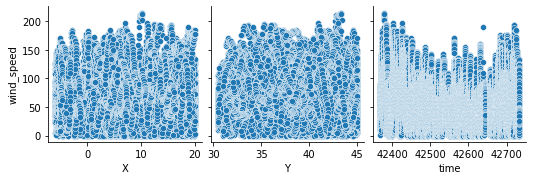

In [17]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars = ['X', 'Y', 'time'], y_vars = 'wind_speed')

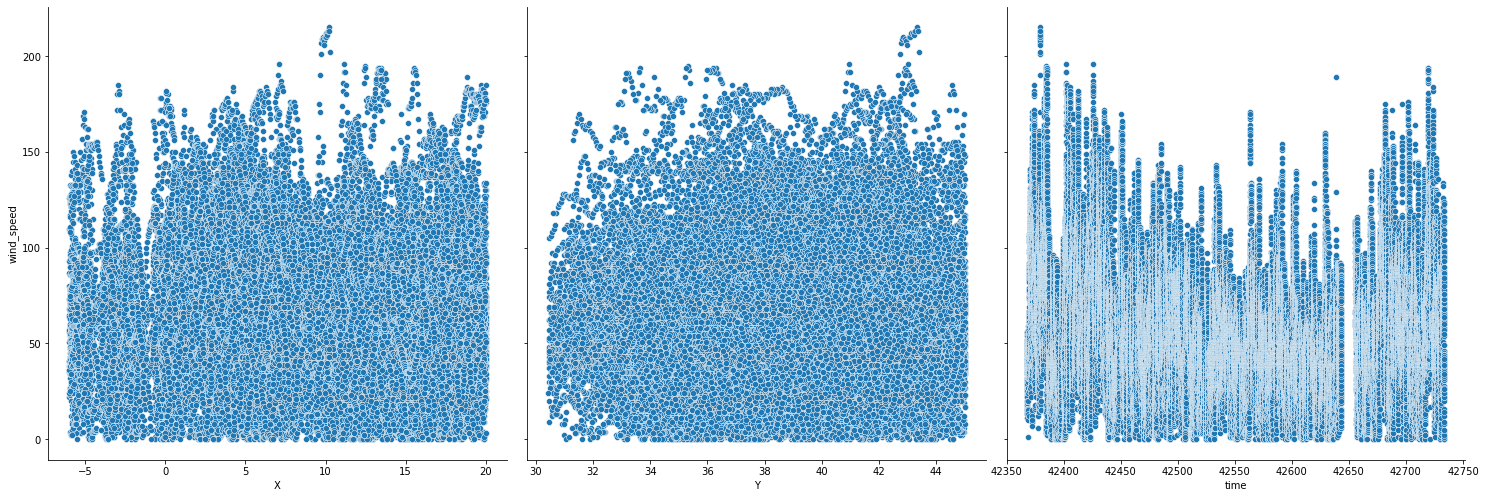

In [18]:
sns.pairplot(data, x_vars = ['X', 'Y', 'time'], y_vars = 'wind_speed', 
             height = 7, aspect = 1, diag_kind = None)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54375, 3)
(18126, 3)
(54375, 1)
(18126, 1)


In [20]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)

<ipython-input-20-00626e2ada86>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X,y)


KNeighborsClassifier(n_neighbors=1)

In [21]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [22]:
check_coord = [[11.79, 33.169998, 42368.149155]]
print(knn.predict(check_coord))

[47.]


In [23]:
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y.values.ravel())
print(knn.predict(check_coord))

[50.]


In [26]:
print(knn.predict(check_coord))

[50.]


In [27]:
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.3469055599233114


In [29]:
data.loc[(data['X'] == 23.1) & (data['Y'] == 79.9)]

,X,Y,time,wind_speed,Time_Analysis


In [36]:
from datetime import datetime

timestamp = 1627114850
#convert timestamp to datetime object
curr_time = datetime.fromtimestamp(timestamp)

print("Current Time:", curr_time)

Current Time: 2021-07-24 13:50:50


In [31]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [38]:
new_coord = [[23.1, 79.9, 1627114850]]
print(knn.predict(new_coord))

[26.]


In [82]:
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


In [45]:
# Testing with Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import GaussianNB

In [41]:
model = GaussianNB()
model.fit(X,y.values.ravel())
predicted= model.predict([[11.79, 33.169998, 42368.149155]])
print("Predicted Value:", predicted)

Predicted Value: [72.]


In [42]:
y_pred = model.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.017930787161556393


In [46]:
# Which value of K should be used?

In [85]:
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.16103939093015557, 0.14608849166942514, 0.12368972746331237, 0.11414542645922983, 0.10978704623193203, 0.10719408584353966, 0.10449078671521571, 0.10084960829747325, 0.09671190555003861, 0.09290521902239876, 0.09069844422376697, 0.08816065320534039, 0.08534701533708484, 0.08341608738828203, 0.08176100628930817, 0.07966457023060797, 0.07767847291183935, 0.07569237559307072, 0.07320975394460995, 0.07282356835484939, 0.07111331788590974, 0.06912722056714113, 0.06747213946816727, 0.06708595387840671, 0.066203243958954]


In [86]:
print(metrics.accuracy_score(y_test, y_pred).mean())

0.066203243958954


Text(0, 0.5, 'Testing Accuracy')

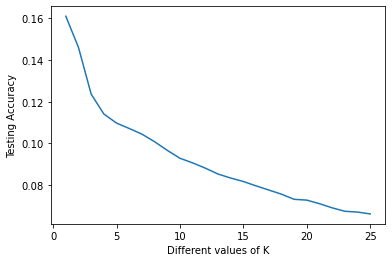

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Different values of K')
plt.ylabel('Testing Accuracy')

In [47]:
# It can be seen that as the no. of neighbors increases, testing accuracy decreases.